<a href="https://colab.research.google.com/github/LucasNeiaTorres/MLP-iris/blob/main/MLP_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

seaborn.set(style='whitegrid'); seaborn.set_context('talk')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sklearn.datasets import load_iris
iris_data = load_iris()

In [ ]:
print(iris_data['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [ ]:
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load the Iris dataset
iris_data = load_iris()

# Join features and labels into a single array
iris_dataset = np.column_stack((iris_data.data, iris_data.target.T))  # shape (150, 5)

# Shuffle the dataset (optional: for reproducibility)
random.seed(123)
random.shuffle(iris_dataset)

# Split features (X) and labels (y)
X = np.array([i[:4] for i in iris_dataset])  # shape (150, 4)
y = np.array([i[4] for i in iris_dataset])   # shape (150,)

# Use train_test_split to divide into 80% train, 20% test
train_X, test_X, train_y, test_y = train_test_split(
    X, y,
    test_size=0.2,
    random_state=11,  # set for reproducibility
    stratify=y        # keep label proportions balanced
)

# Now you have train_X, train_y, test_X, test_y ready

print(test_y)

[0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 2. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 0.]


In [ ]:
# Implementation the Multilayer Perceptron in Python
from sklearn.base import BaseEstimator, ClassifierMixin, RegressorMixin
import random
import numpy as np
import matplotlib.pyplot as plt

class MultiLayerPerceptron(BaseEstimator, ClassifierMixin):

    def __init__(self, params=None):
        # Store the params argument to satisfy BaseEstimator requirements
        self.params = params

        if (params == None):
            self.inputLayer = 4                        # Input Layer
            self.hiddenLayer = 5                       # Hidden Layer
            self.outputLayer = 3                       # Outpuy Layer
            self.learningRate = 0.005                  # Learning rate
            self.max_epochs = 600                      # Epochs
            self.iasHiddenValue = -1                   # Bias HiddenLayer
            self.BiasOutputValue = -1                  # Bias OutputLayer
            self.activation = self.ativacao['sigmoid'] # Activation function
            self.deriv = self.derivada['sigmoid']
        else:
            self.inputLayer = params['InputLayer']
            self.hiddenLayer = params['HiddenLayer']
            self.outputLayer = params['OutputLayer']
            self.learningRate = params['LearningRate']
            self.max_epochs = params['Epocas']
            self.BiasHiddenValue = params['BiasHiddenValue']
            self.BiasOutputValue = params['BiasOutputValue']
            self.activation = self.ativacao[params['ActivationFunction']]
            self.deriv = self.derivada[params['ActivationFunction']]

        # Starting Bias and Weights
        # assign ramdom values [-1 .. +1] in order to start with some weights
        # not so symmetric
        # Weight initialization: passing correct arguments to starting_weights
        self.WEIGHT_hidden = self.starting_weights(self.inputLayer, self.hiddenLayer)
        self.WEIGHT_output = self.starting_weights(self.hiddenLayer, self.outputLayer)

        self.BIAS_hidden = np.array([self.BiasHiddenValue for i in range(self.hiddenLayer)])
        self.BIAS_output = np.array([self.BiasOutputValue for i in range(self.outputLayer)]) # Corrected attribute name
        self.classes_number = 3

    pass

    # This function creates a 2D matrix of random values between -1 and +1
    # Shape: rows x columns
    def starting_weights(self, rows, columns):
        return [[2  * random.random() - 1 for _ in range(columns)] for _ in range(rows)]

    ativacao = {
         'sigmoid': (lambda x: 1/(1 + np.exp(-x))),
            'tanh': (lambda x: np.tanh(x)),
            'Relu': (lambda x: x*(x > 0)),
               }
    derivada = {
         'sigmoid': (lambda x: x*(1-x)),
            'tanh': (lambda x: 1-x**2),
            'Relu': (lambda x: 1 * (x>0))
               }

    # This calculates the error at the output layer and then propagates it
    # backward through the network to update the weights in each layer
    def Backpropagation_Algorithm(self, x):
        DELTA_output = []
        # Stage 1 - Error: OutputLayer (target - predicted)
        ERROR_output = self.output - self.OUTPUT_L2
        DELTA_output = ((-1)*(ERROR_output) * self.deriv(self.OUTPUT_L2))

        arrayStore = []
        # Stage 2 - Update weights OutputLayer and HiddenLayer
        for i in range(self.hiddenLayer):
            for j in range(self.outputLayer): # Corrected attribute name
                self.WEIGHT_output[i][j] -= (self.learningRate * (DELTA_output[j] * self.OUTPUT_L1[i]))
                self.BIAS_output[j] -= (self.learningRate * DELTA_output[j])

        # Stage 3 - Error: HiddenLayer
        delta_hidden = np.matmul(self.WEIGHT_output, DELTA_output)* self.deriv(self.OUTPUT_L1)

        # Stage 4 - Update weights HiddenLayer and InputLayer(x)
        for i in range(self.inputLayer):
            for j in range(self.hiddenLayer):
                self.WEIGHT_hidden[i][j] -= (self.learningRate * (delta_hidden[j] * x[i]))
                self.BIAS_hidden[j] -= (self.learningRate * delta_hidden[j])



    def show_err_graphic(self,v_erro,v_epoca):
        plt.figure(figsize=(9,4))
        plt.plot(v_epoca, v_erro, color="b", marker=11)
        plt.xlabel("Number of Epochs")
        plt.ylabel("Squared error (MSE) ");
        plt.title("Error Minimization")
        plt.show()


    def predict(self, X, y):
        'Returns the predictions for every element of X'
        my_predictions = []
        'Forward Propagation'
        forward = np.matmul(X,self.WEIGHT_hidden) + self.BIAS_hidden
        forward = np.matmul(forward, self.WEIGHT_output) + self.BIAS_output
        for i in forward:
            my_predictions.append(max(enumerate(i), key=lambda x:x[1])[0])

        array_score = []
        for i in range(len(my_predictions)):
            if my_predictions[i] == 0:
                array_score.append([i, 'Iris-setosa', my_predictions[i], y[i]])
            elif my_predictions[i] == 1:
                 array_score.append([i, 'Iris-versicolour', my_predictions[i], y[i]])
            elif my_predictions[i] == 2:
                 array_score.append([i, 'Iris-virginica', my_predictions[i], y[i]])

        dataframe = pd.DataFrame(array_score, columns=['_id', 'class', 'output', 'hoped_output'])
        return my_predictions, dataframe

    def fit(self, X, y):
        count_epoch = 1
        total_error = 0
        n = len(X);
        epoch_array = []
        error_array = []
        # Initialize lists to store specific weight values for plotting
        weight_over_epochs_W0_plot = []
        weight_over_epochs_W1_plot = []


        while(count_epoch <= self.max_epochs):
            for idx,inputs in enumerate(X):
                self.output = np.zeros(self.classes_number)
                'Stage 1 - (Forward Propagation)'
                self.OUTPUT_L1 = self.activation((np.dot(inputs, self.WEIGHT_hidden) + self.BIAS_hidden))
                self.OUTPUT_L2 = self.activation((np.dot(self.OUTPUT_L1, self.WEIGHT_output) + self.BIAS_output))
                'Stage 2 - One-Hot-Encoding'
                if(y[idx] == 0):
                    self.output = np.array([1,0,0]) #Class1 {1,0,0}
                elif(y[idx] == 1):
                    self.output = np.array([0,1,0]) #Class2 {0,1,0}
                elif(y[idx] == 2):
                    self.output = np.array([0,0,1]) #Class3 {0,0,1}

                square_error = 0
                for i in range(self.outputLayer):
                    erro = (self.output[i] - self.OUTPUT_L2[i])**2
                    square_error = (square_error + (0.05 * erro))
                    total_error = total_error + square_error

                'Backpropagation : Update Weights'
                self.Backpropagation_Algorithm(inputs)

            # The original code calculates total_error per batch, then divides by n (number of samples).
            # It's more standard to calculate the mean squared error per epoch by summing errors over
            # all samples in the epoch and then dividing by the number of output neurons.
            # Keeping the original logic for total_error calculation, but this is not
            # a standard MSE calculation.
            total_error = (total_error / n)
            if((count_epoch % 50 == 0)or(count_epoch == 1)):
                print("Epoch ", count_epoch, "- Total Error: ",total_error)
                error_array.append(total_error)
                epoch_array.append(count_epoch)
                # Append the specific weight values only when we are recording the epoch
                weight_over_epochs_W0_plot.append(self.WEIGHT_hidden[0][0])
                weight_over_epochs_W1_plot.append(self.WEIGHT_output[0][0])


            # Reset total_error for the next epoch
            total_error = 0

            count_epoch += 1
        self.show_err_graphic(error_array,epoch_array)

        # Plot the change of a *single* weight over the epochs that were recorded
        plt.figure(figsize=(8, 4))
        # Use the new lists which have the same length as epoch_array
        plt.plot(epoch_array, weight_over_epochs_W0_plot, label='Weight[0][0]')
        plt.title('Change of a Sample Weight (Input 0 to Hidden 0) over Epochs')
        plt.xlabel('Number of Epochs')
        plt.ylabel('Weight Value')
        plt.legend()
        plt.show()

        plt.figure(figsize=(8, 4))
        # Use the new lists which have the same length as epoch_array
        plt.plot(epoch_array, weight_over_epochs_W1_plot, label='Weight[0][0]')
        plt.title('Change of a Sample Weight (Hidden 0 to Output 0) over Epochs')
        plt.xlabel('Number of Epochs')
        plt.ylabel('Weight Value')
        plt.legend()
        plt.show()


        return self

Epoch  1 - Total Error:  0.06758981166881102
Epoch  50 - Total Error:  0.04024720417130557
Epoch  100 - Total Error:  0.02286486557652496
Epoch  150 - Total Error:  0.013276352862066243
Epoch  200 - Total Error:  0.009687618408255076
Epoch  250 - Total Error:  0.008328459058811613
Epoch  300 - Total Error:  0.00761468849032985
Epoch  350 - Total Error:  0.007178426628736327
Epoch  400 - Total Error:  0.0068849363253296655
Epoch  450 - Total Error:  0.0066741124956628956
Epoch  500 - Total Error:  0.006515455891651994
Epoch  550 - Total Error:  0.0063919712060187825
Epoch  600 - Total Error:  0.006293445523627044
Epoch  650 - Total Error:  0.006213323972163785
Epoch  700 - Total Error:  0.00614715062622757
Epoch  750 - Total Error:  0.0060917538254136585
Epoch  800 - Total Error:  0.006044802234347227
Epoch  850 - Total Error:  0.006004547869273663
Epoch  900 - Total Error:  0.0059696645270964875
Epoch  950 - Total Error:  0.005939137568842788
Epoch  1000 - Total Error:  0.0059121845294

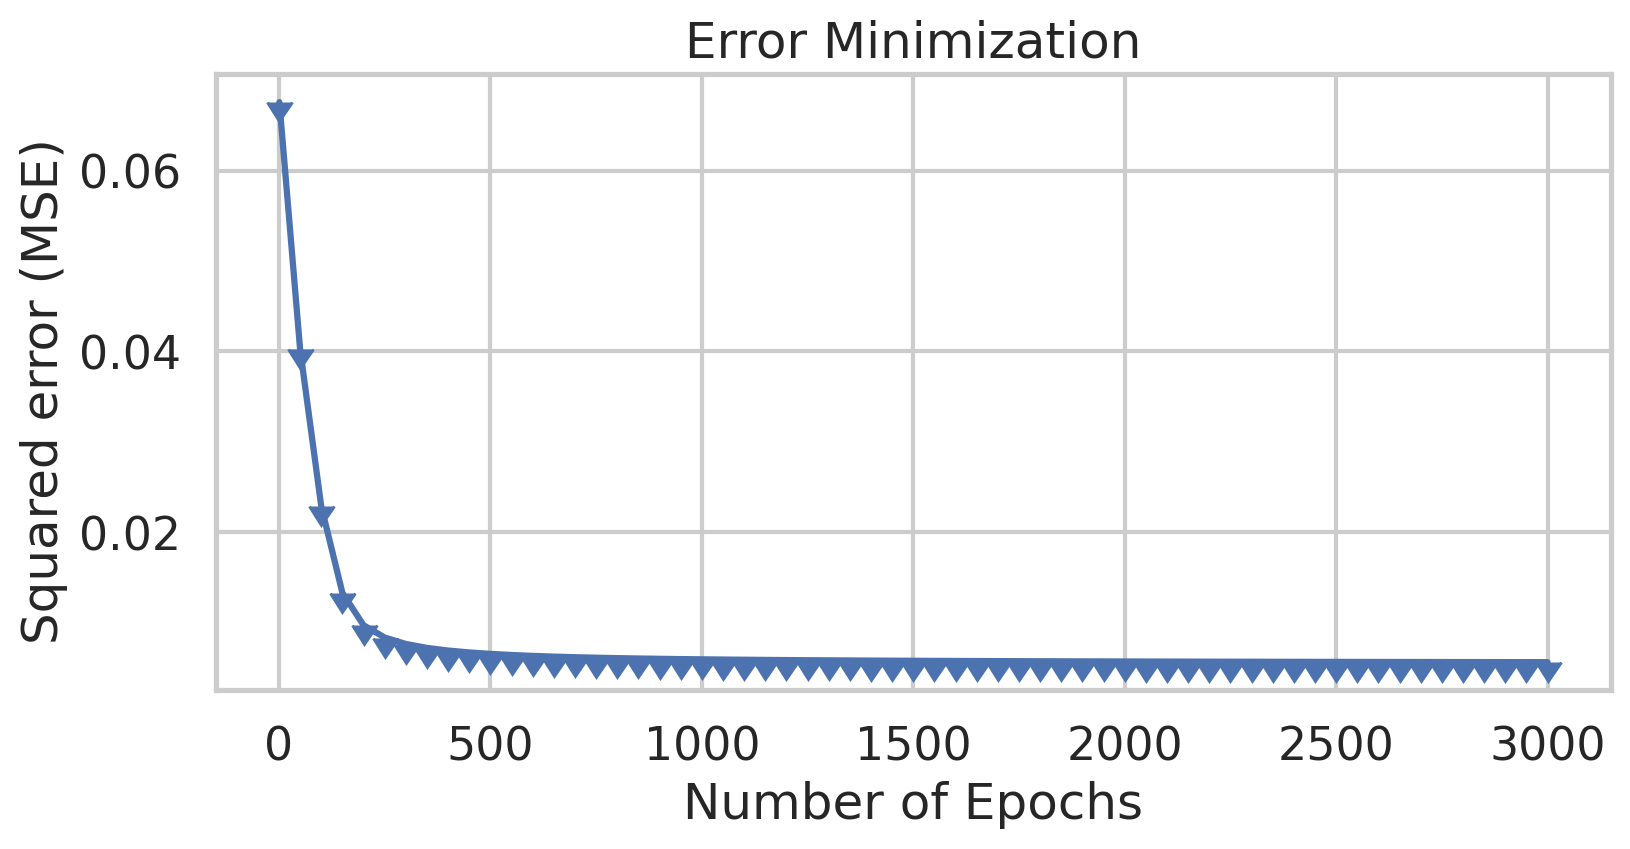

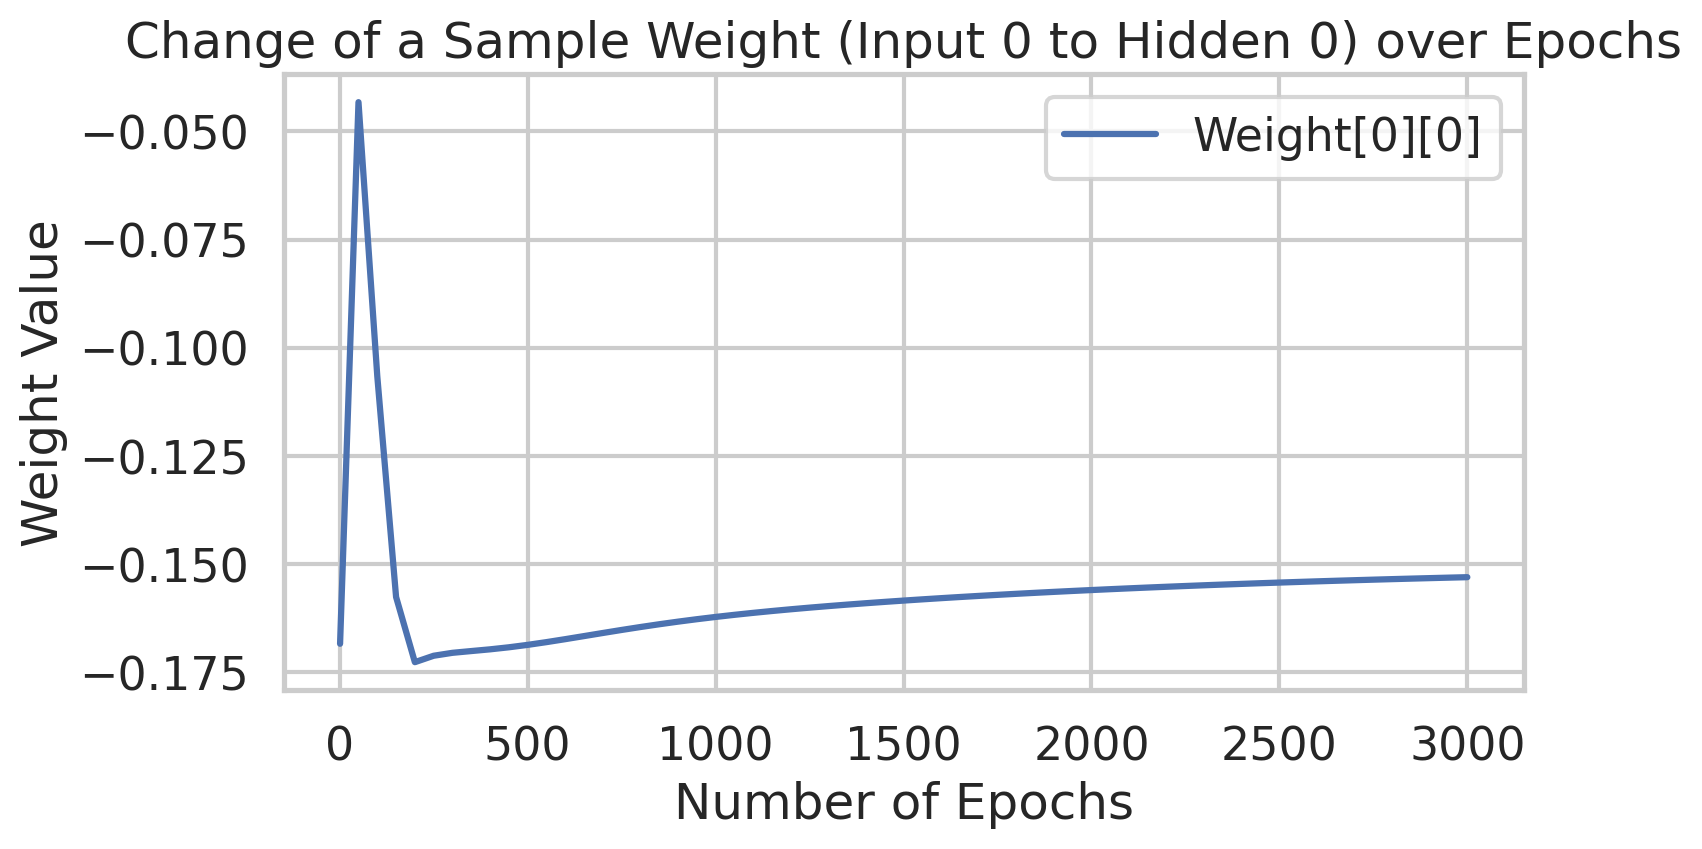

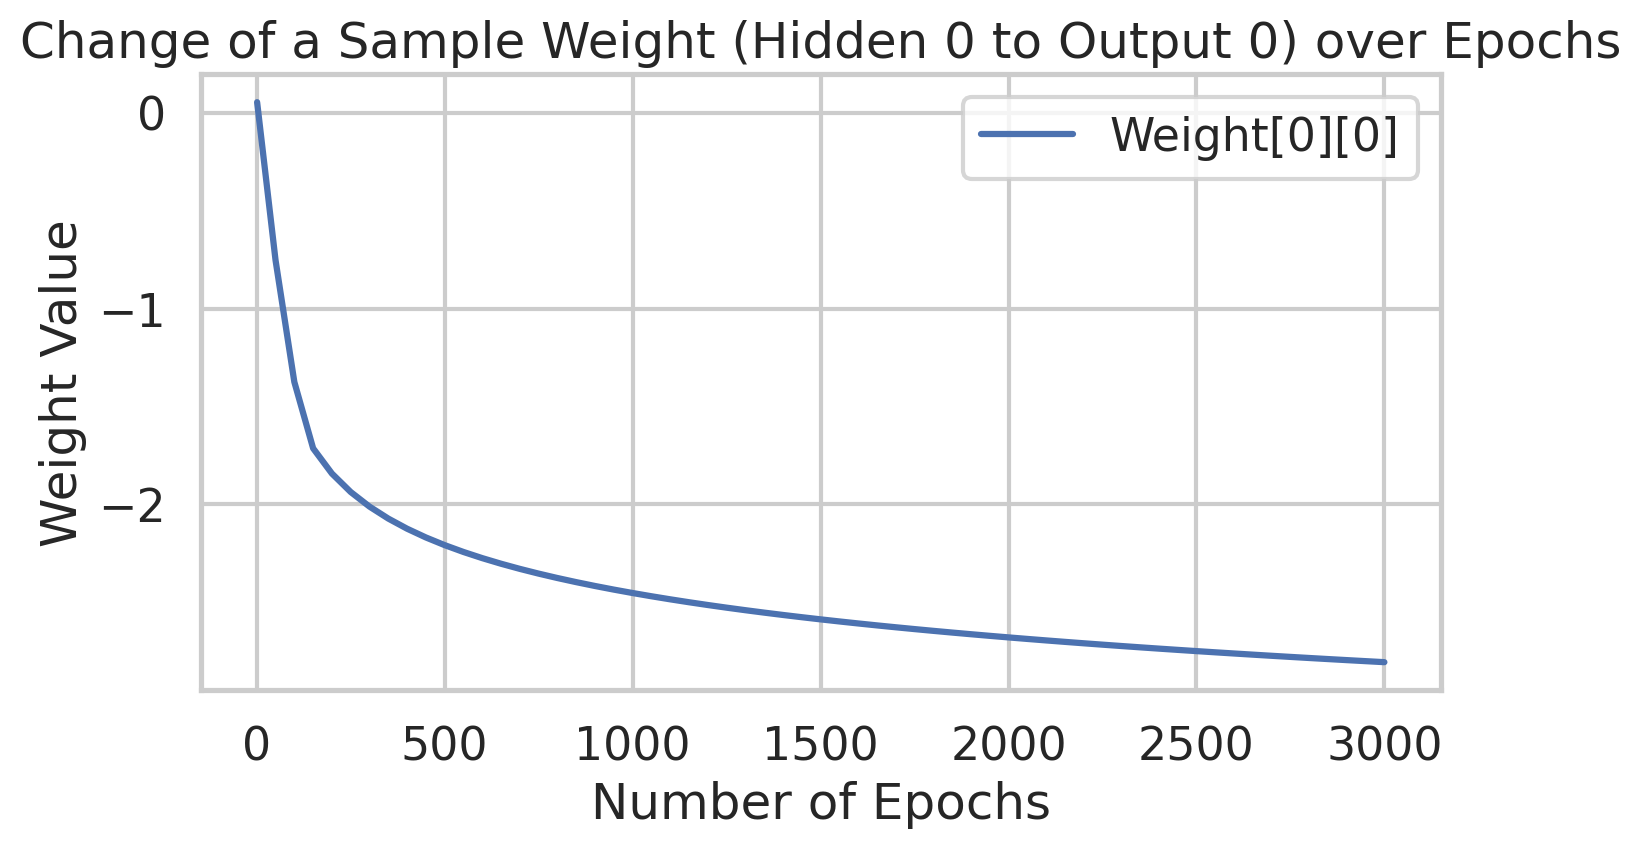

MultiLayerPerceptron(params={'ActivationFunction': 'sigmoid',
                             'BiasHiddenValue': -1, 'BiasOutputValue': -1,
                             'Epocas': 3000, 'HiddenLayer': 5, 'InputLayer': 4,
                             'LearningRate': 0.005, 'OutputLayer': 3})

In [ ]:
dictionary = {'InputLayer':4, 'HiddenLayer':5, 'OutputLayer':3,
              'Epocas':3000, 'LearningRate':0.005,'BiasHiddenValue':-1,
              'BiasOutputValue':-1, 'ActivationFunction':'sigmoid'}

Perceptron = MultiLayerPerceptron(dictionary)
Perceptron.fit(train_X,train_y)

In [ ]:
prev, dataframe = Perceptron.predict(test_X, test_y)
hits = n_set = n_vers = n_virg = 0
score_set = score_vers = score_virg = 0
for j in range(len(test_y)):
    if(test_y[j] == 0): n_set += 1
    elif(test_y[j] == 1): n_vers += 1
    elif(test_y[j] == 2): n_virg += 1

for i in range(len(test_y)):
    if test_y[i] == prev[i]:
        hits += 1
    if test_y[i] == prev[i] and test_y[i] == 0:
        score_set += 1
    elif test_y[i] == prev[i] and test_y[i] == 1:
        score_vers += 1
    elif test_y[i] == prev[i] and test_y[i] == 2:
        score_virg += 1

hits = (hits / len(test_y)) * 100
faults = 100 - hits

print("Porcents :","%.2f"%(hits),"% hits","and","%.2f"%(faults),"% faults")
print("Total samples of test",len(test_y))
print("*Iris-Setosa:",n_set,"samples", score_set, "hits")
print("*Iris-Versicolour:",n_vers,"samples", score_vers, "hits")
print("*Iris-Virginica:",n_virg,"samples", score_virg, "hits")

Porcents : 30.00 % hits and 70.00 % faults
Total samples of test 30
*Iris-Setosa: 20 samples 0 hits
*Iris-Versicolour: 9 samples 9 hits
*Iris-Virginica: 1 samples 0 hits


In [ ]:
dataframe

,_id,class,output,hoped_output
0,0,Iris-setosa,0,0.0
1,1,Iris-setosa,0,0.0
2,2,Iris-setosa,0,0.0
3,3,Iris-versicolour,1,1.0
4,4,Iris-versicolour,1,1.0
5,5,Iris-setosa,0,0.0
6,6,Iris-versicolour,1,1.0
7,7,Iris-setosa,0,0.0
8,8,Iris-versicolour,1,1.0
9,9,Iris-setosa,0,0.0


- Acurracy Iris-Setosa: 100.00 %
- Acurracy Iris-Versicolour: 100.00 %
- Acurracy Iris-Virginica: 0.00 %


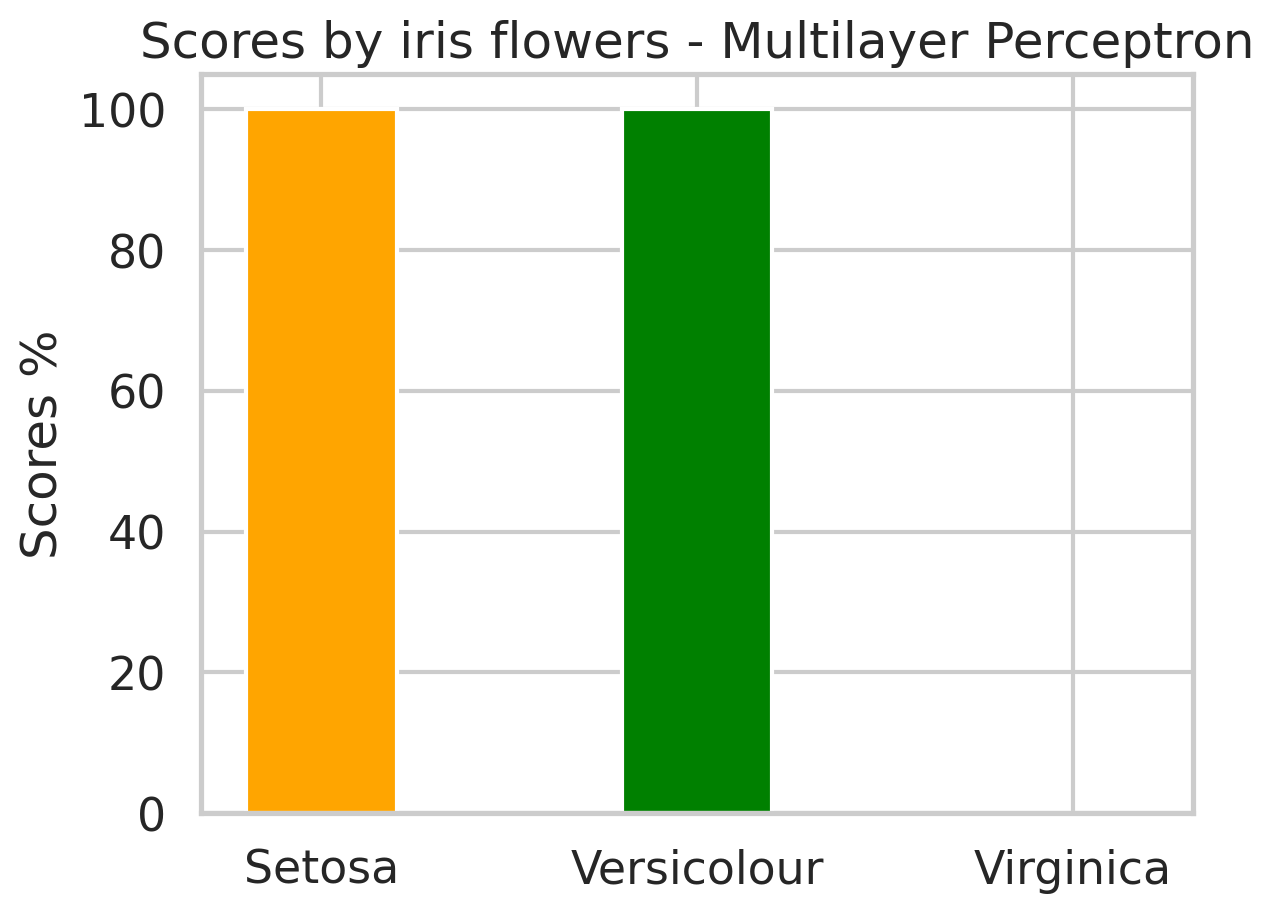

In [ ]:
acc_set = (score_set/n_set)*100
acc_vers = (score_vers/n_vers)*100
acc_virg = (score_virg/n_virg)*100
print("- Acurracy Iris-Setosa:","%.2f"%acc_set, "%")
print("- Acurracy Iris-Versicolour:","%.2f"%acc_vers, "%")
print("- Acurracy Iris-Virginica:","%.2f"%acc_virg, "%")
names = ["Setosa","Versicolour","Virginica"]
x1 = [2.0,4.0,6.0]
fig, ax = plt.subplots()
r1 = plt.bar(x1[0], acc_set,color='orange',label='Iris-Setosa')
r2 = plt.bar(x1[1], acc_vers,color='green',label='Iris-Versicolour')
r3 = plt.bar(x1[2], acc_virg,color='purple',label='Iris-Virginica')
plt.ylabel('Scores %')
plt.xticks(x1, names);plt.title('Scores by iris flowers - Multilayer Perceptron')
plt.show()

# Com **tanh**

Epoch  1 - Total Error:  0.04643591664520524
Epoch  50 - Total Error:  0.00624623398019134
Epoch  100 - Total Error:  0.005903978859804228
Epoch  150 - Total Error:  0.005775896112738435
Epoch  200 - Total Error:  0.0057078370507280705
Epoch  250 - Total Error:  0.005665211654247739
Epoch  300 - Total Error:  0.005635853767336598
Epoch  350 - Total Error:  0.005614333857627987
Epoch  400 - Total Error:  0.005597847299550722
Epoch  450 - Total Error:  0.005584793325563602
Epoch  500 - Total Error:  0.005574189209168826
Epoch  550 - Total Error:  0.005565397062220301
Epoch  600 - Total Error:  0.0055579841667649675
Epoch  650 - Total Error:  0.005551646288772948
Epoch  700 - Total Error:  0.005546163091240545
Epoch  750 - Total Error:  0.005541370962074487
Epoch  800 - Total Error:  0.005537145790020694
Epoch  850 - Total Error:  0.005533391675074257
Epoch  900 - Total Error:  0.005530033312447511
Epoch  950 - Total Error:  0.005527010724338289
Epoch  1000 - Total Error:  0.0055242755346

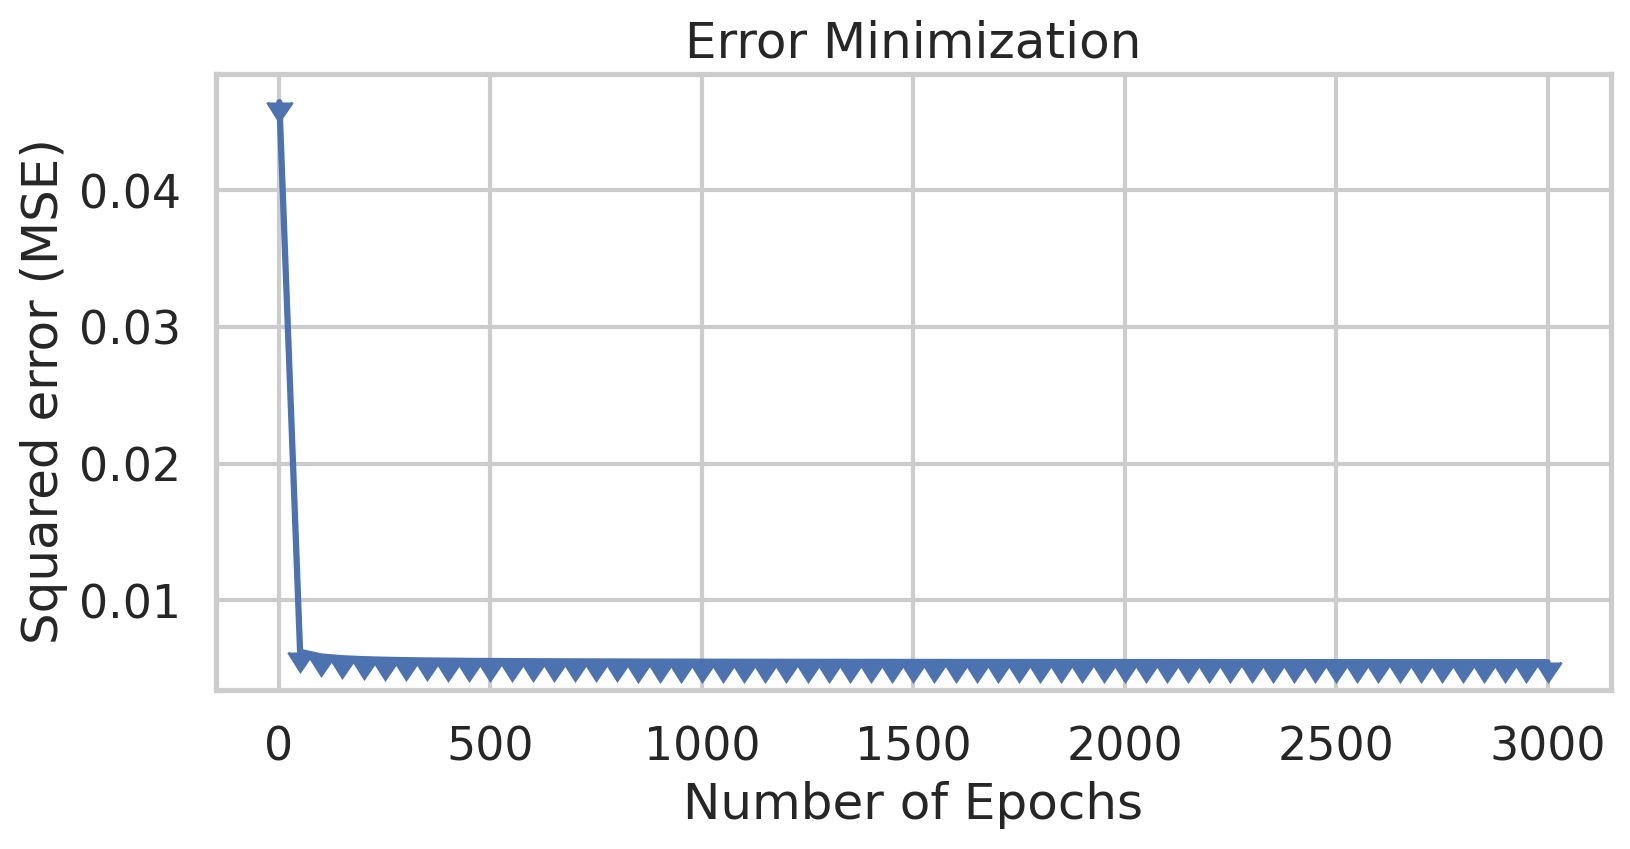

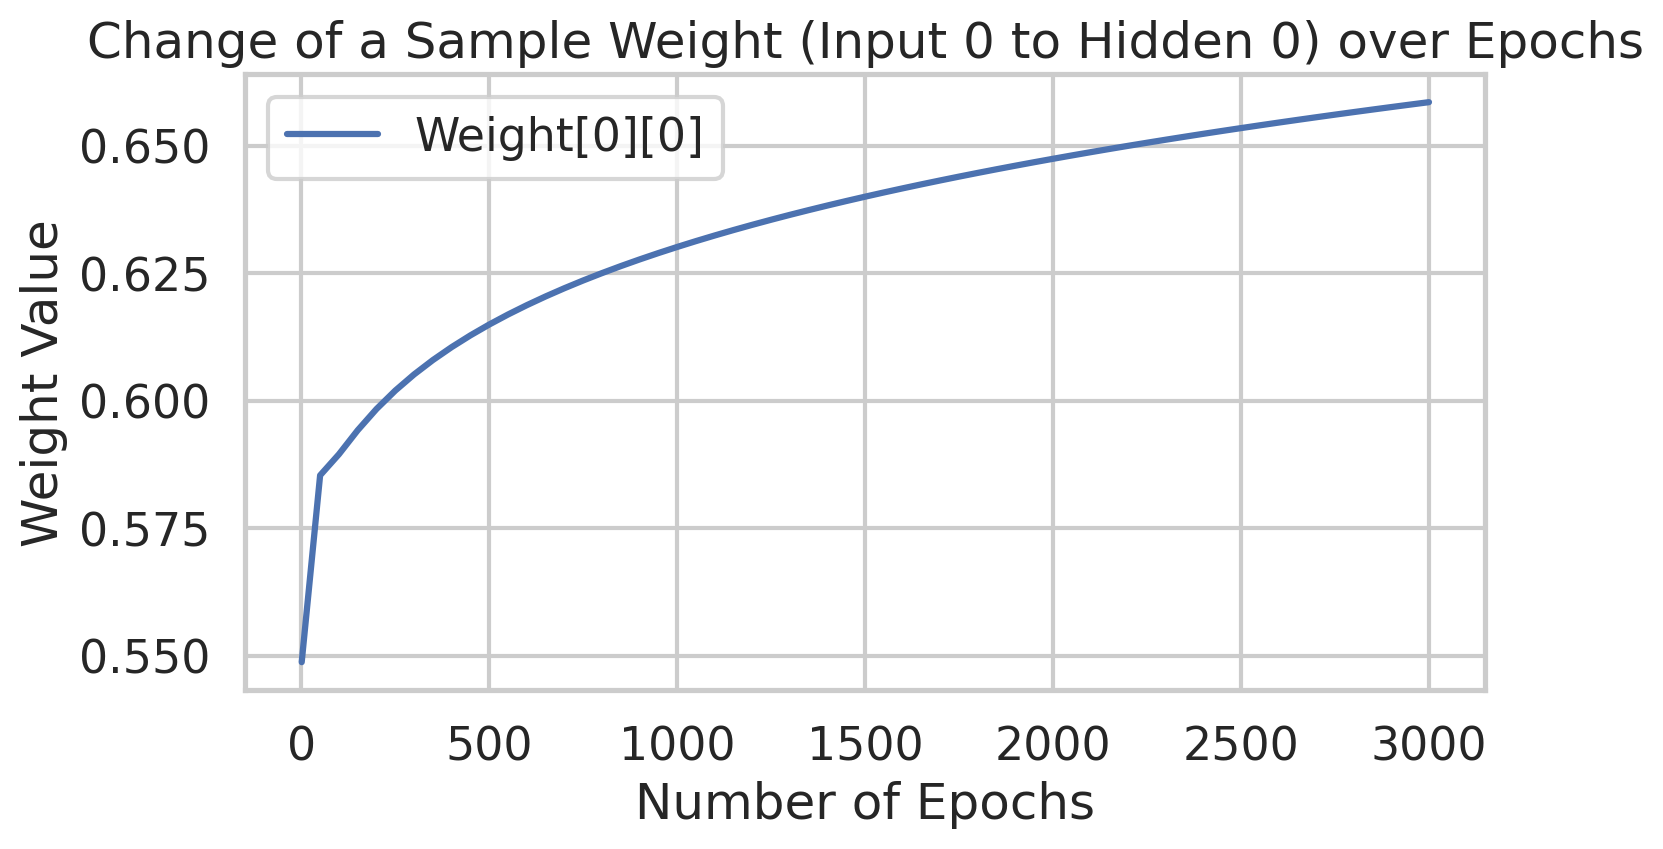

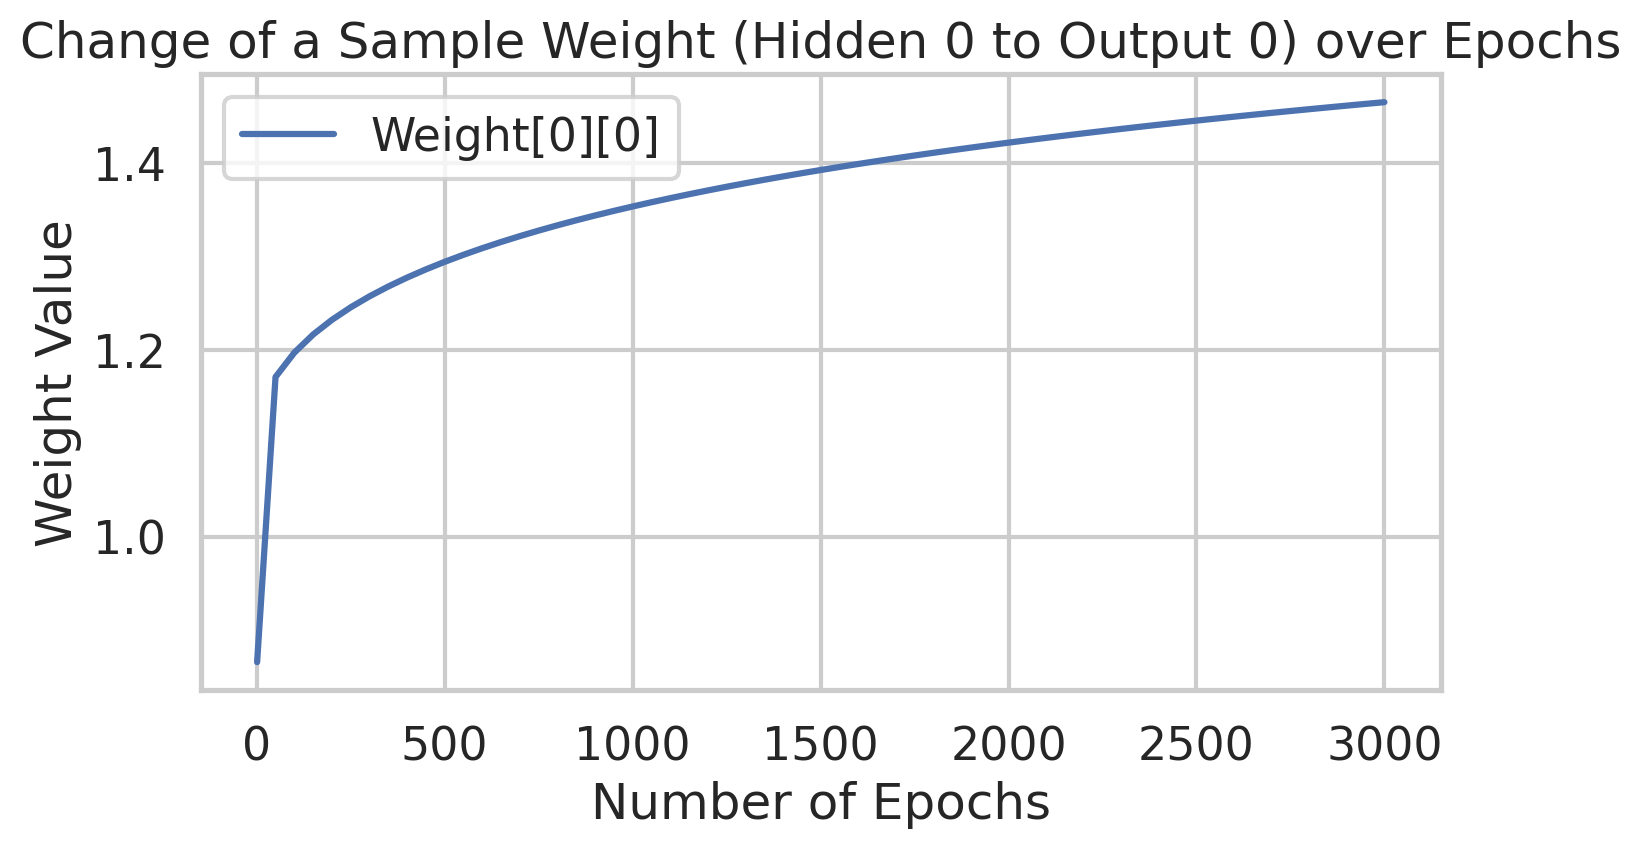

MultiLayerPerceptron(params={'ActivationFunction': 'tanh',
                             'BiasHiddenValue': -1, 'BiasOutputValue': -1,
                             'Epocas': 3000, 'HiddenLayer': 5, 'InputLayer': 4,
                             'LearningRate': 0.005, 'OutputLayer': 3})

In [ ]:
dictionary = {'InputLayer':4, 'HiddenLayer':5, 'OutputLayer':3,
              'Epocas':3000, 'LearningRate':0.005,'BiasHiddenValue':-1,
              'BiasOutputValue':-1, 'ActivationFunction':'tanh'}

Perceptron = MultiLayerPerceptron(dictionary)
Perceptron.fit(train_X,train_y)

In [ ]:
prev, dataframe = Perceptron.predict(test_X, test_y)
hits = n_set = n_vers = n_virg = 0
score_set = score_vers = score_virg = 0
for j in range(len(test_y)):
    if(test_y[j] == 0): n_set += 1
    elif(test_y[j] == 1): n_vers += 1
    elif(test_y[j] == 2): n_virg += 1

for i in range(len(test_y)):
    if test_y[i] == prev[i]:
        hits += 1
    if test_y[i] == prev[i] and test_y[i] == 0:
        score_set += 1
    elif test_y[i] == prev[i] and test_y[i] == 1:
        score_vers += 1
    elif test_y[i] == prev[i] and test_y[i] == 2:
        score_virg += 1

hits = (hits / len(test_y)) * 100
faults = 100 - hits

print("Porcents :","%.2f"%(hits),"% hits","and","%.2f"%(faults),"% faults")
print("Total samples of test",len(test_y))
print("*Iris-Setosa:",n_set,"samples", score_set, "hits")
print("*Iris-Versicolour:",n_vers,"samples", score_vers, "hits")
print("*Iris-Virginica:",n_virg,"samples", score_virg, "hits")

Porcents : 96.67 % hits and 3.33 % faults
Total samples of test 30
*Iris-Setosa: 20 samples 20 hits
*Iris-Versicolour: 9 samples 9 hits
*Iris-Virginica: 1 samples 0 hits


- Acurracy Iris-Setosa: 100.00 %
- Acurracy Iris-Versicolour: 100.00 %
- Acurracy Iris-Virginica: 0.00 %


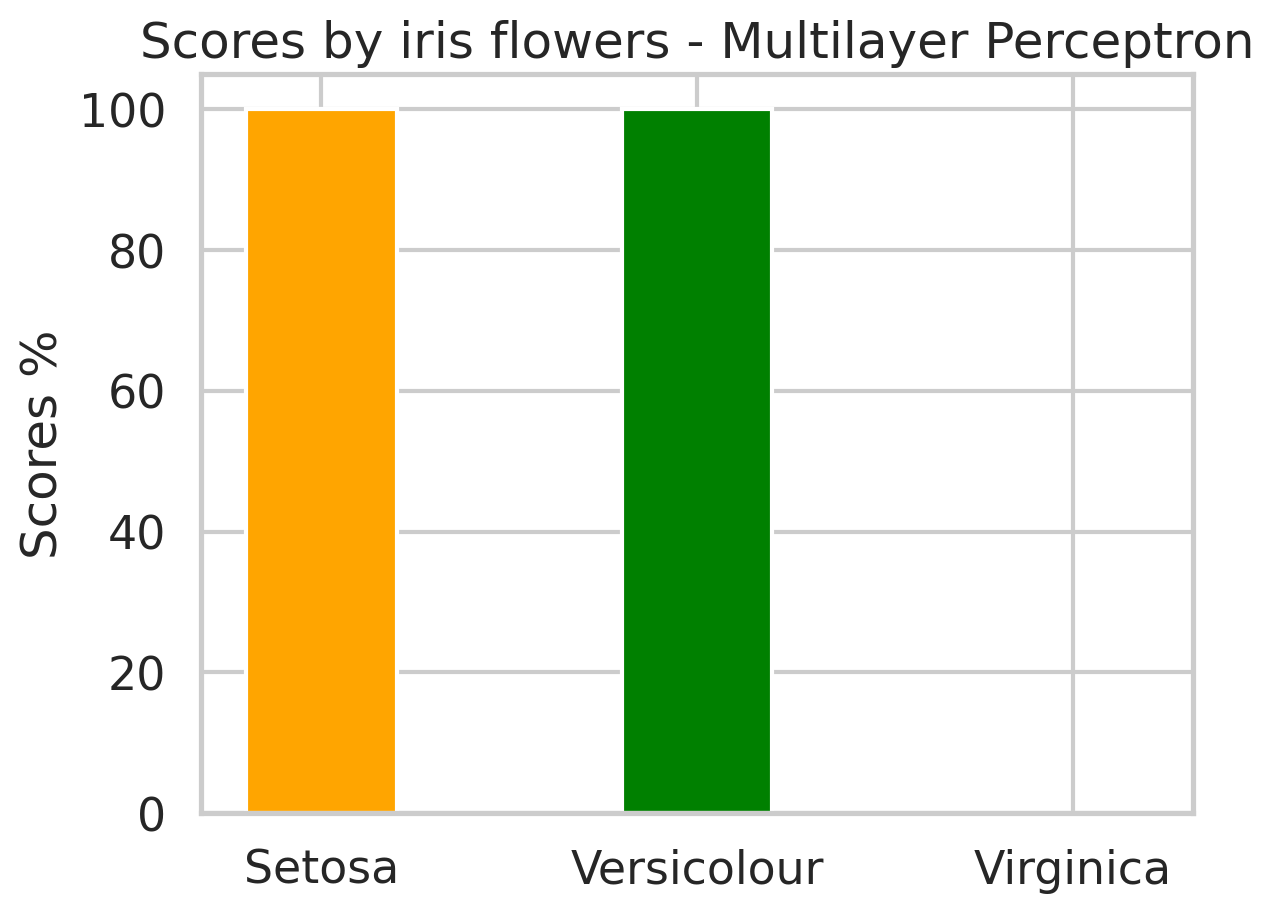

In [ ]:
acc_set = (score_set/n_set)*100
acc_vers = (score_vers/n_vers)*100
acc_virg = (score_virg/n_virg)*100
print("- Acurracy Iris-Setosa:","%.2f"%acc_set, "%")
print("- Acurracy Iris-Versicolour:","%.2f"%acc_vers, "%")
print("- Acurracy Iris-Virginica:","%.2f"%acc_virg, "%")
names = ["Setosa","Versicolour","Virginica"]
x1 = [2.0,4.0,6.0]
fig, ax = plt.subplots()
r1 = plt.bar(x1[0], acc_set,color='orange',label='Iris-Setosa')
r2 = plt.bar(x1[1], acc_vers,color='green',label='Iris-Versicolour')
r3 = plt.bar(x1[2], acc_virg,color='purple',label='Iris-Virginica')
plt.ylabel('Scores %')
plt.xticks(x1, names);plt.title('Scores by iris flowers - Multilayer Perceptron')
plt.show()

# Com **Relu**

Epoch  1 - Total Error:  0.13208333333333408
Epoch  50 - Total Error:  0.13208333333333408
Epoch  100 - Total Error:  0.13208333333333408
Epoch  150 - Total Error:  0.13208333333333408
Epoch  200 - Total Error:  0.13208333333333408
Epoch  250 - Total Error:  0.13208333333333408
Epoch  300 - Total Error:  0.13208333333333408
Epoch  350 - Total Error:  0.13208333333333408
Epoch  400 - Total Error:  0.13208333333333408
Epoch  450 - Total Error:  0.13208333333333408
Epoch  500 - Total Error:  0.13208333333333408
Epoch  550 - Total Error:  0.13208333333333408
Epoch  600 - Total Error:  0.13208333333333408
Epoch  650 - Total Error:  0.13208333333333408
Epoch  700 - Total Error:  0.13208333333333408
Epoch  750 - Total Error:  0.13208333333333408
Epoch  800 - Total Error:  0.13208333333333408
Epoch  850 - Total Error:  0.13208333333333408
Epoch  900 - Total Error:  0.13208333333333408
Epoch  950 - Total Error:  0.13208333333333408
Epoch  1000 - Total Error:  0.13208333333333408
Epoch  1050 - T

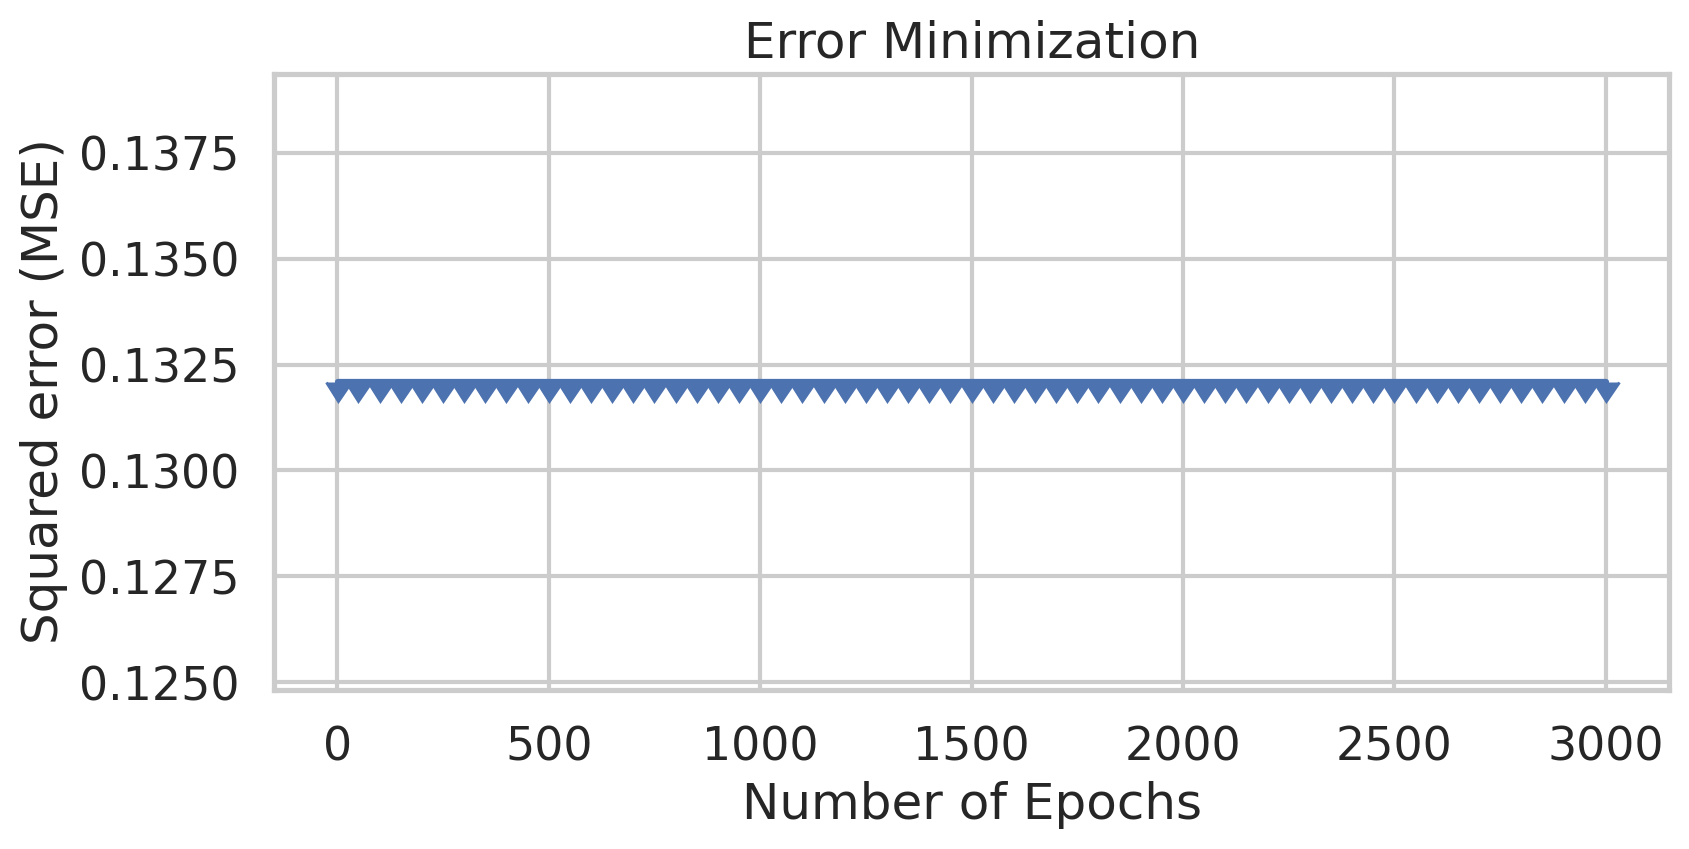

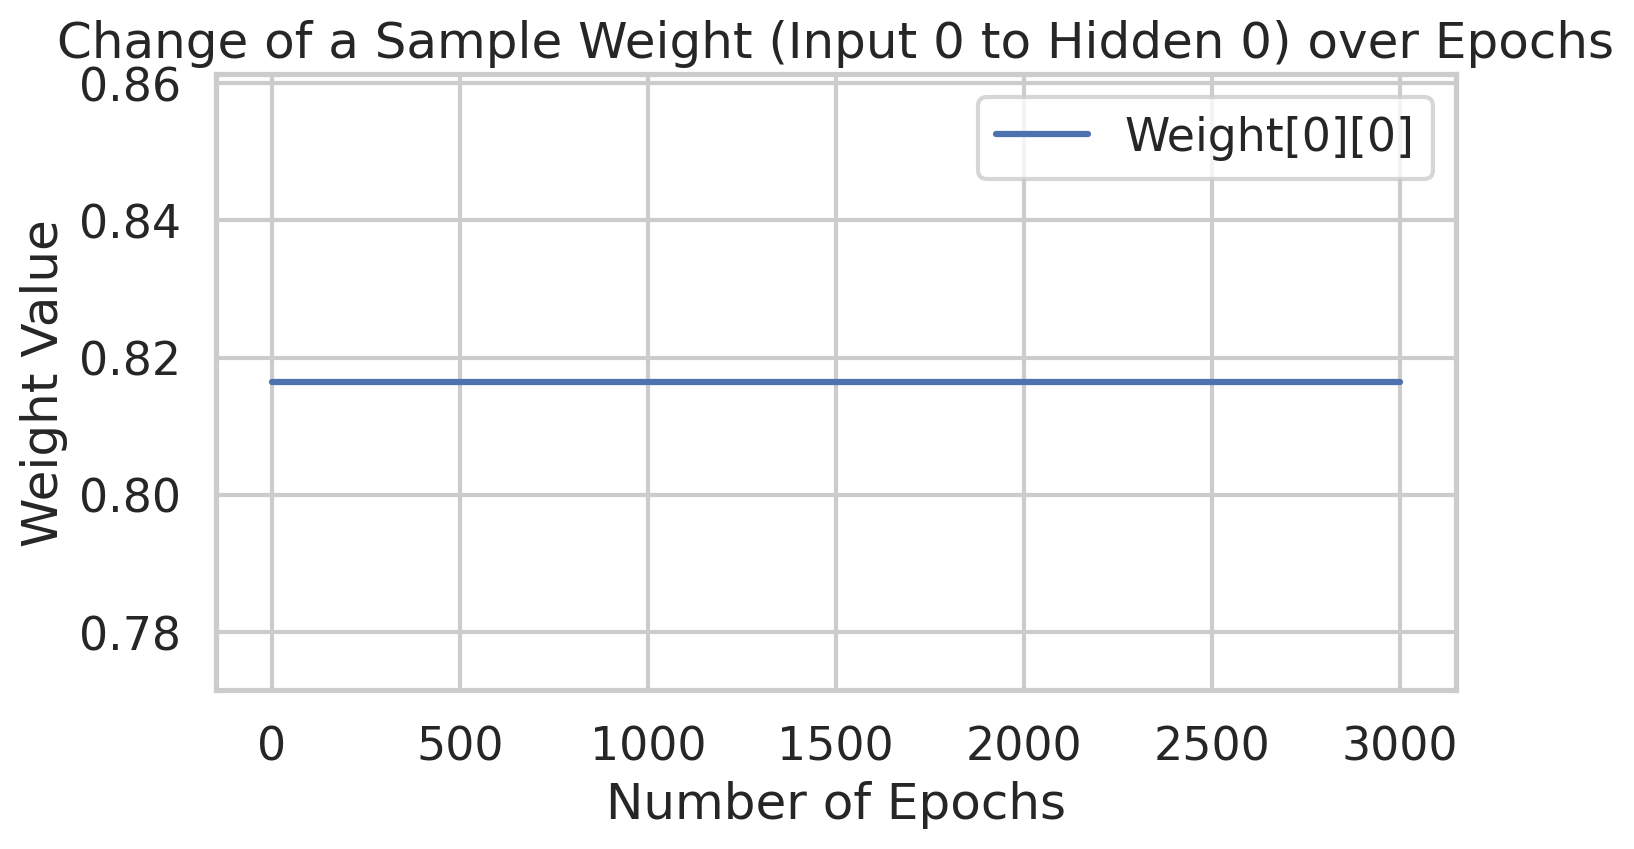

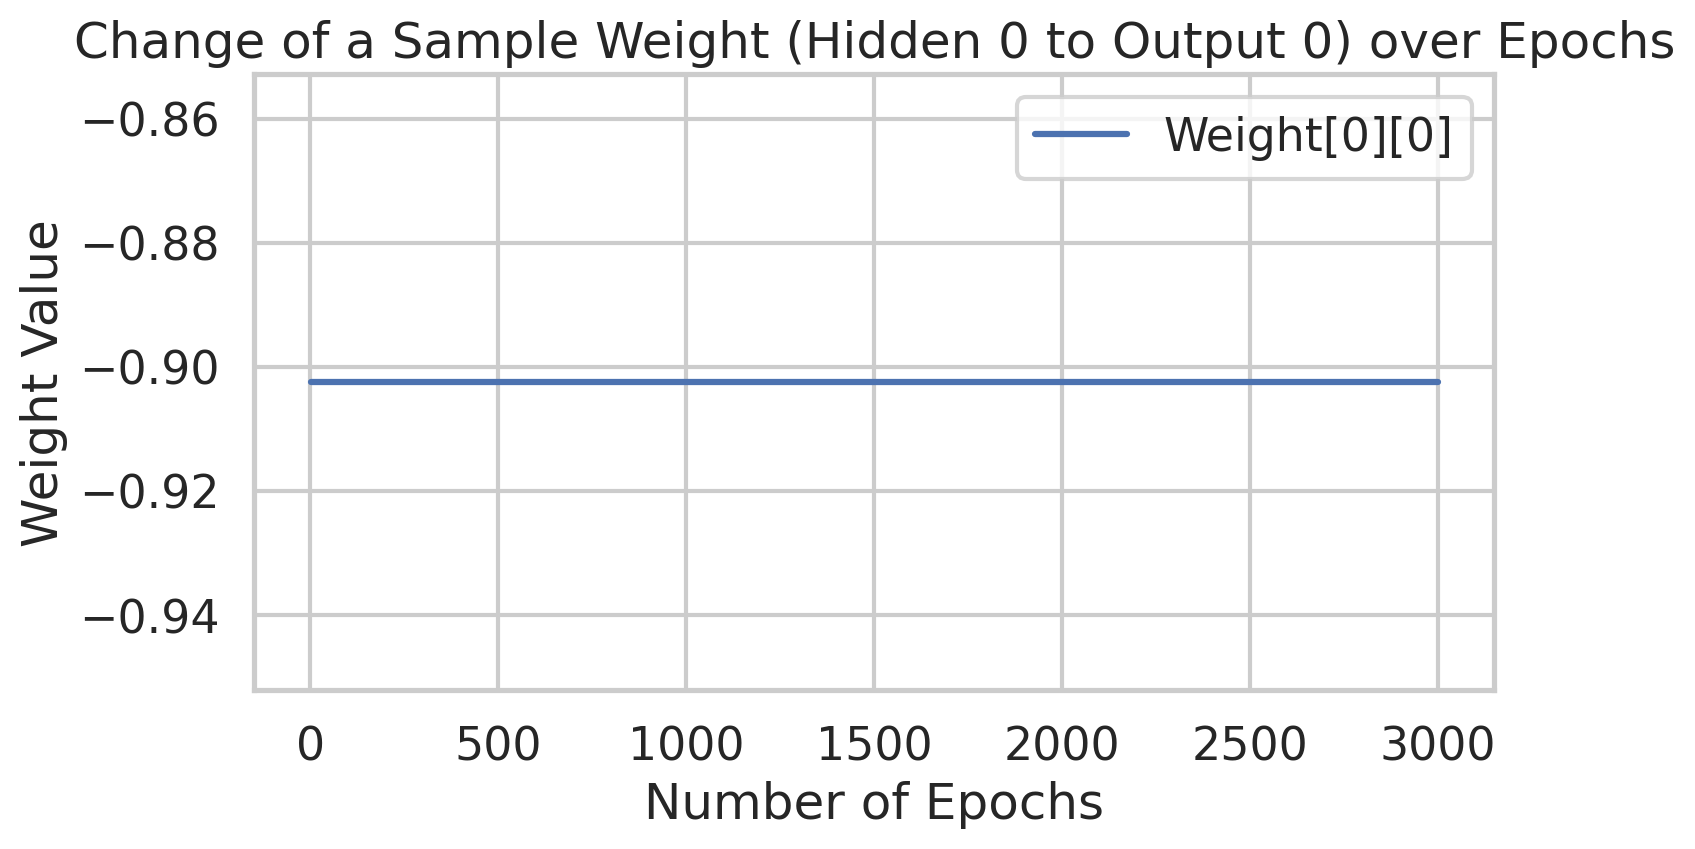

MultiLayerPerceptron(params={'ActivationFunction': 'Relu',
                             'BiasHiddenValue': -1, 'BiasOutputValue': -1,
                             'Epocas': 3000, 'HiddenLayer': 5, 'InputLayer': 4,
                             'LearningRate': 0.005, 'OutputLayer': 3})

In [ ]:
dictionary = {'InputLayer':4, 'HiddenLayer':5, 'OutputLayer':3,
              'Epocas':3000, 'LearningRate':0.005,'BiasHiddenValue':-1,
              'BiasOutputValue':-1, 'ActivationFunction':'Relu'}

Perceptron = MultiLayerPerceptron(dictionary)
Perceptron.fit(train_X,train_y)

Epoch  1 - Total Error:  0.11480345690967285
Epoch  50 - Total Error:  0.10693613587658651
Epoch  100 - Total Error:  0.10650931982456392
Epoch  150 - Total Error:  0.10637499856943128
Epoch  200 - Total Error:  0.1060654665418695
Epoch  250 - Total Error:  0.10596118828956749
Epoch  300 - Total Error:  0.10581599214911017
Epoch  350 - Total Error:  0.10565227860156022
Epoch  400 - Total Error:  0.10557537795010717
Epoch  450 - Total Error:  0.10553054757269262
Epoch  500 - Total Error:  0.10550051938486235
Epoch  550 - Total Error:  0.10547923402782779
Epoch  600 - Total Error:  0.10546367901455328
Epoch  650 - Total Error:  0.10545198648261904
Epoch  700 - Total Error:  0.10544298835360531
Epoch  750 - Total Error:  0.1054359235091261
Epoch  800 - Total Error:  0.10543027727299051
Epoch  850 - Total Error:  0.10542557878603216
Epoch  900 - Total Error:  0.1053933403204609
Epoch  950 - Total Error:  0.10535885499888893
Epoch  1000 - Total Error:  0.10532298080828079
Epoch  1050 - Tota

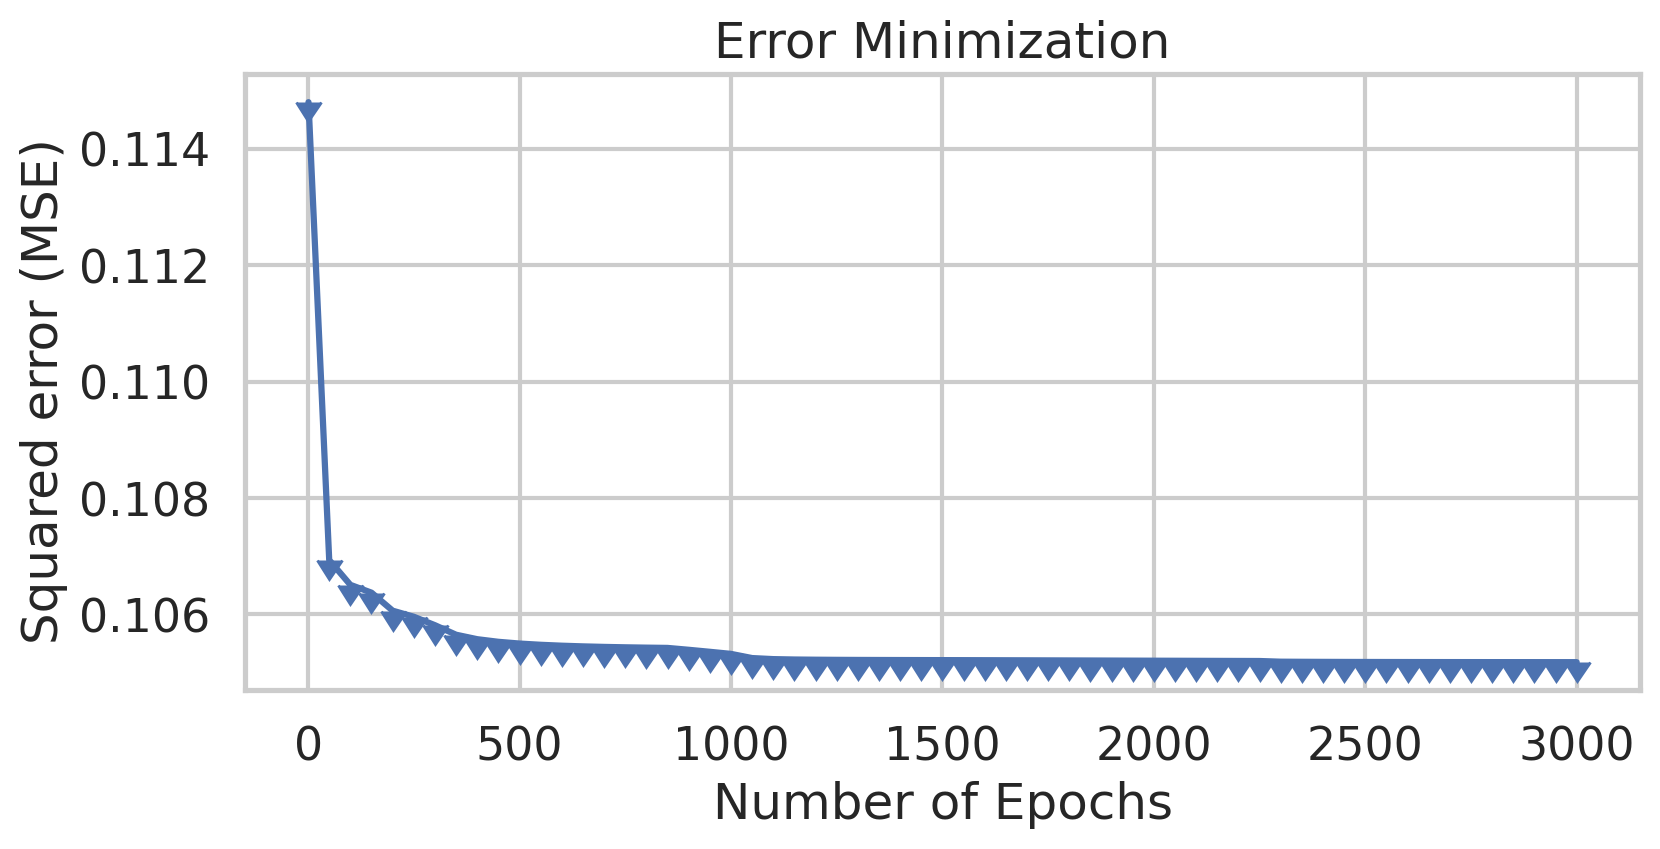

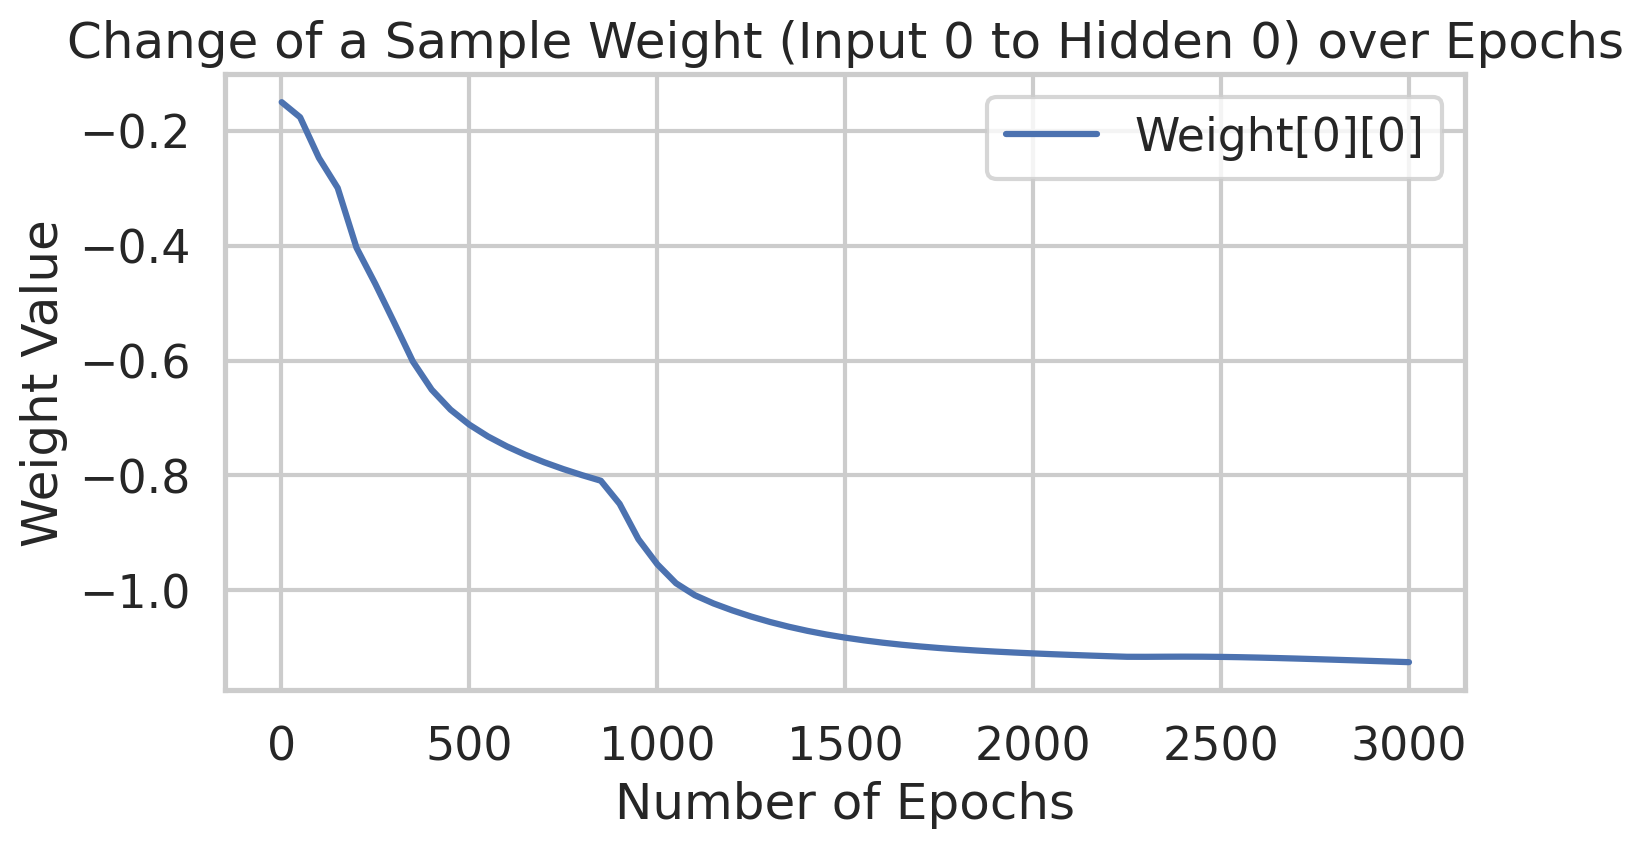

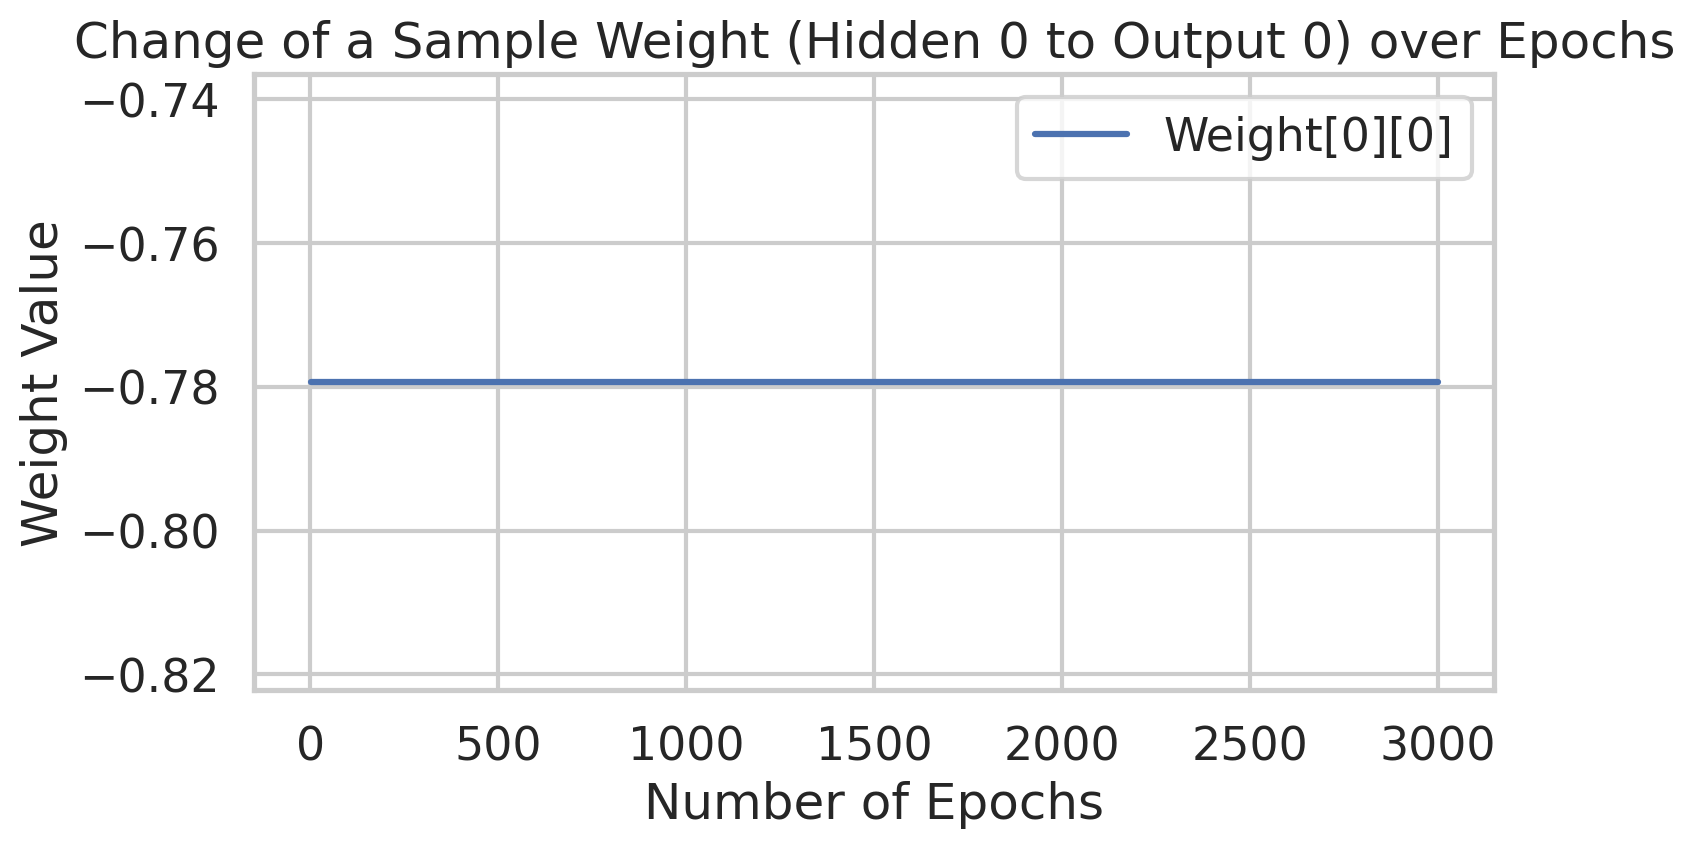

MultiLayerPerceptron(params={'ActivationFunction': 'Relu', 'BiasHiddenValue': 0,
                             'BiasOutputValue': -1, 'Epocas': 3000,
                             'HiddenLayer': 5, 'InputLayer': 4,
                             'LearningRate': 0.005, 'OutputLayer': 3})

In [ ]:
dictionary = {'InputLayer':4, 'HiddenLayer':5, 'OutputLayer':3,
              'Epocas':3000, 'LearningRate':0.005,'BiasHiddenValue':0,
              'BiasOutputValue':-1, 'ActivationFunction':'Relu'}

Perceptron = MultiLayerPerceptron(dictionary)
Perceptron.fit(train_X,train_y)

In [ ]:
prev, dataframe = Perceptron.predict(test_X, test_y)
hits = n_set = n_vers = n_virg = 0
score_set = score_vers = score_virg = 0
for j in range(len(test_y)):
    if(test_y[j] == 0): n_set += 1
    elif(test_y[j] == 1): n_vers += 1
    elif(test_y[j] == 2): n_virg += 1

for i in range(len(test_y)):
    if test_y[i] == prev[i]:
        hits += 1
    if test_y[i] == prev[i] and test_y[i] == 0:
        score_set += 1
    elif test_y[i] == prev[i] and test_y[i] == 1:
        score_vers += 1
    elif test_y[i] == prev[i] and test_y[i] == 2:
        score_virg += 1

hits = (hits / len(test_y)) * 100
faults = 100 - hits

print("Porcents :","%.2f"%(hits),"% hits","and","%.2f"%(faults),"% faults")
print("Total samples of test",len(test_y))
print("*Iris-Setosa:",n_set,"samples", score_set, "hits")
print("*Iris-Versicolour:",n_vers,"samples", score_vers, "hits")
print("*Iris-Virginica:",n_virg,"samples", score_virg, "hits")

Porcents : 30.00 % hits and 70.00 % faults
Total samples of test 30
*Iris-Setosa: 20 samples 0 hits
*Iris-Versicolour: 9 samples 9 hits
*Iris-Virginica: 1 samples 0 hits


- Acurracy Iris-Setosa: 0.00 %
- Acurracy Iris-Versicolour: 100.00 %
- Acurracy Iris-Virginica: 0.00 %


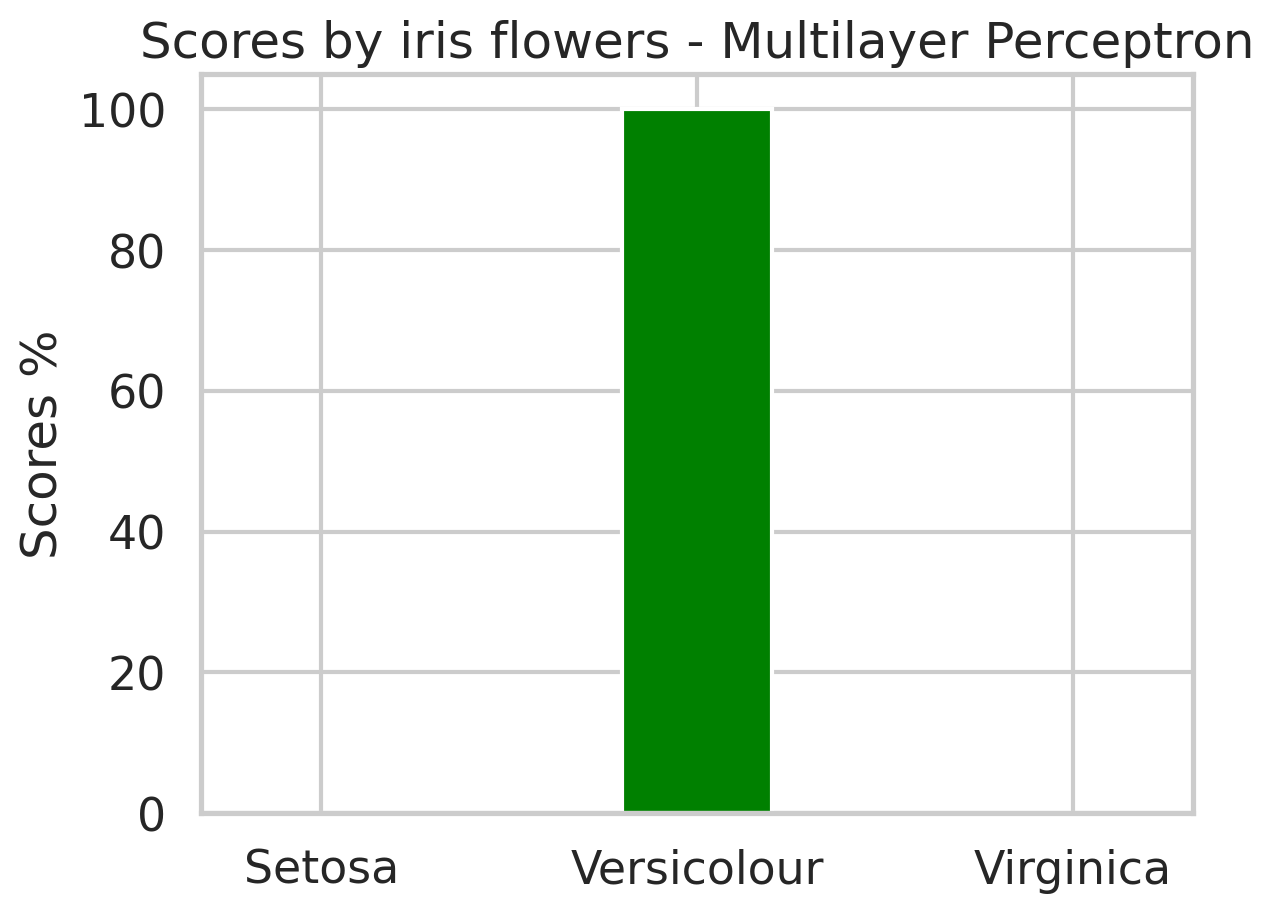

In [ ]:
acc_set = (score_set/n_set)*100
acc_vers = (score_vers/n_vers)*100
acc_virg = (score_virg/n_virg)*100
print("- Acurracy Iris-Setosa:","%.2f"%acc_set, "%")
print("- Acurracy Iris-Versicolour:","%.2f"%acc_vers, "%")
print("- Acurracy Iris-Virginica:","%.2f"%acc_virg, "%")
names = ["Setosa","Versicolour","Virginica"]
x1 = [2.0,4.0,6.0]
fig, ax = plt.subplots()
r1 = plt.bar(x1[0], acc_set,color='orange',label='Iris-Setosa')
r2 = plt.bar(x1[1], acc_vers,color='green',label='Iris-Versicolour')
r3 = plt.bar(x1[2], acc_virg,color='purple',label='Iris-Virginica')
plt.ylabel('Scores %')
plt.xticks(x1, names);plt.title('Scores by iris flowers - Multilayer Perceptron')
plt.show()

# Com **sigmoid**, LR maior, HL maior

Epoch  1 - Total Error:  0.07527305703386147
Epoch  50 - Total Error:  0.008863484052862696
Epoch  100 - Total Error:  0.0071424012770757005
Epoch  150 - Total Error:  0.006626819941889074
Epoch  200 - Total Error:  0.006385583126908123
Epoch  250 - Total Error:  0.0062395802393562
Epoch  300 - Total Error:  0.006132604845356353
Epoch  350 - Total Error:  0.006038928826101483
Epoch  400 - Total Error:  0.00593847269101905
Epoch  450 - Total Error:  0.00581180217582969
Epoch  500 - Total Error:  0.005631313566549318
Epoch  550 - Total Error:  0.005354504771812472
Epoch  600 - Total Error:  0.005192003661882541
Epoch  650 - Total Error:  0.005025908859793928
Epoch  700 - Total Error:  0.004839325065677433
Epoch  750 - Total Error:  0.004626440662234105
Epoch  800 - Total Error:  0.0043830114421617005
Epoch  850 - Total Error:  0.004107888156876074
Epoch  900 - Total Error:  0.003804800698531132
Epoch  950 - Total Error:  0.0034833123809647707
Epoch  1000 - Total Error:  0.003157451237410

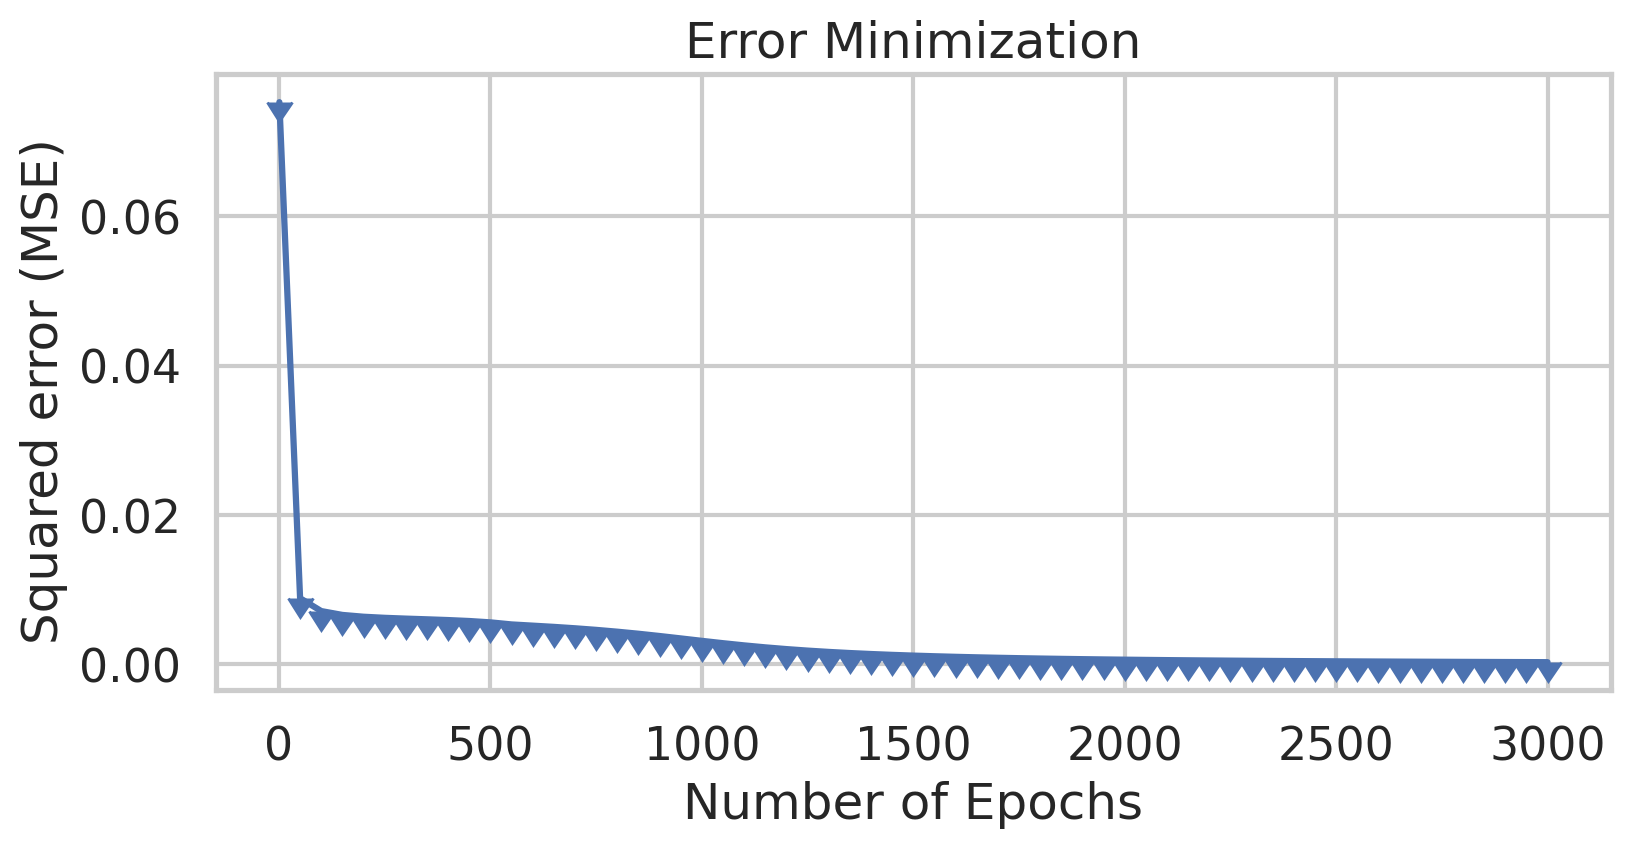

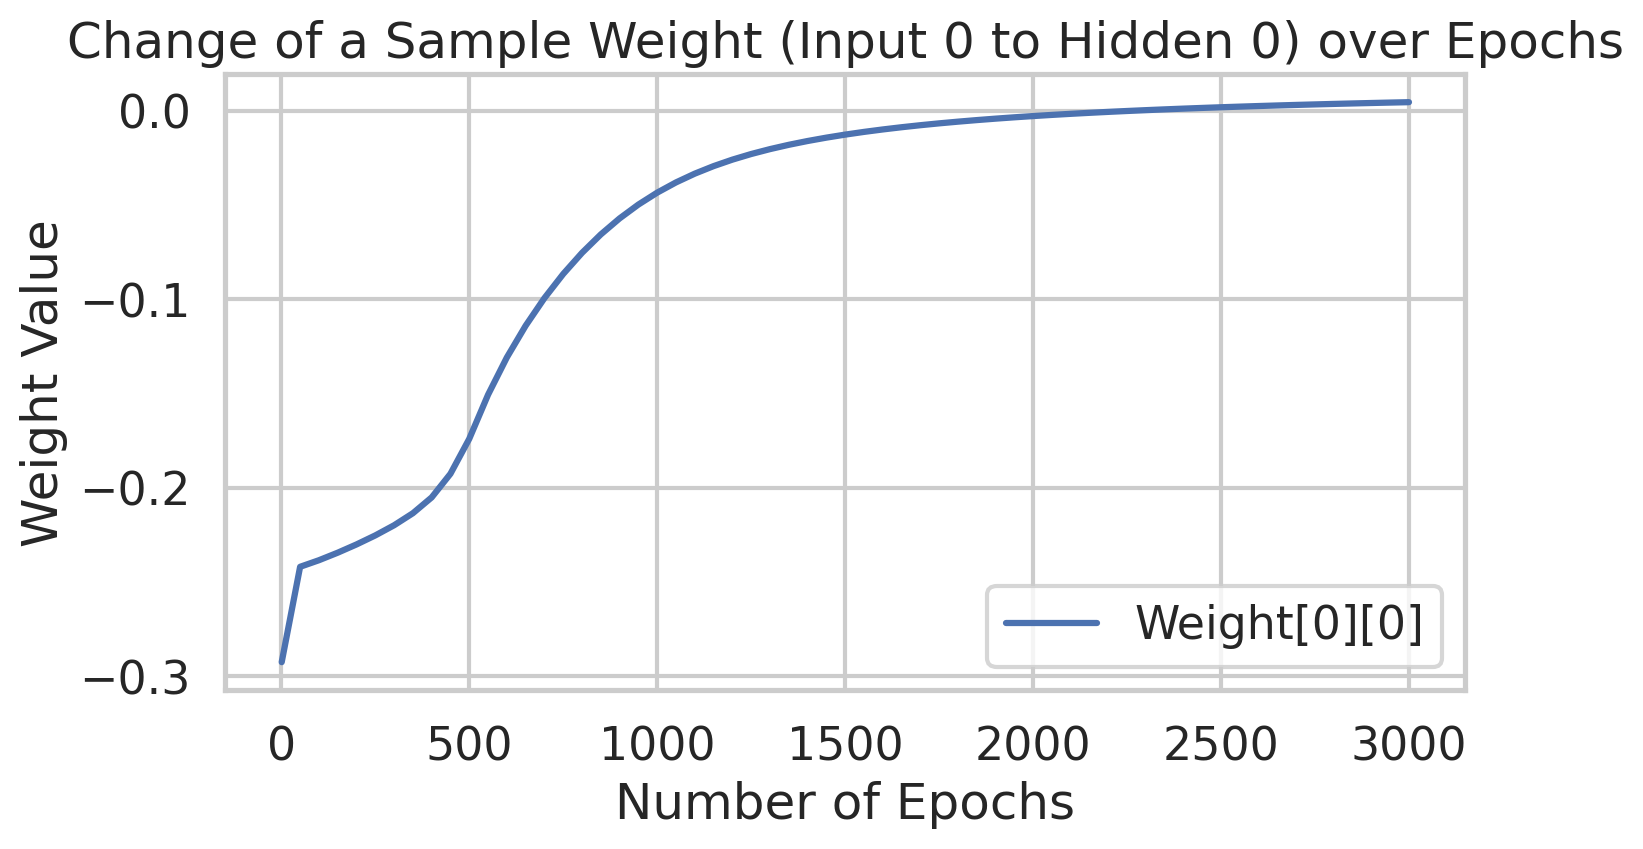

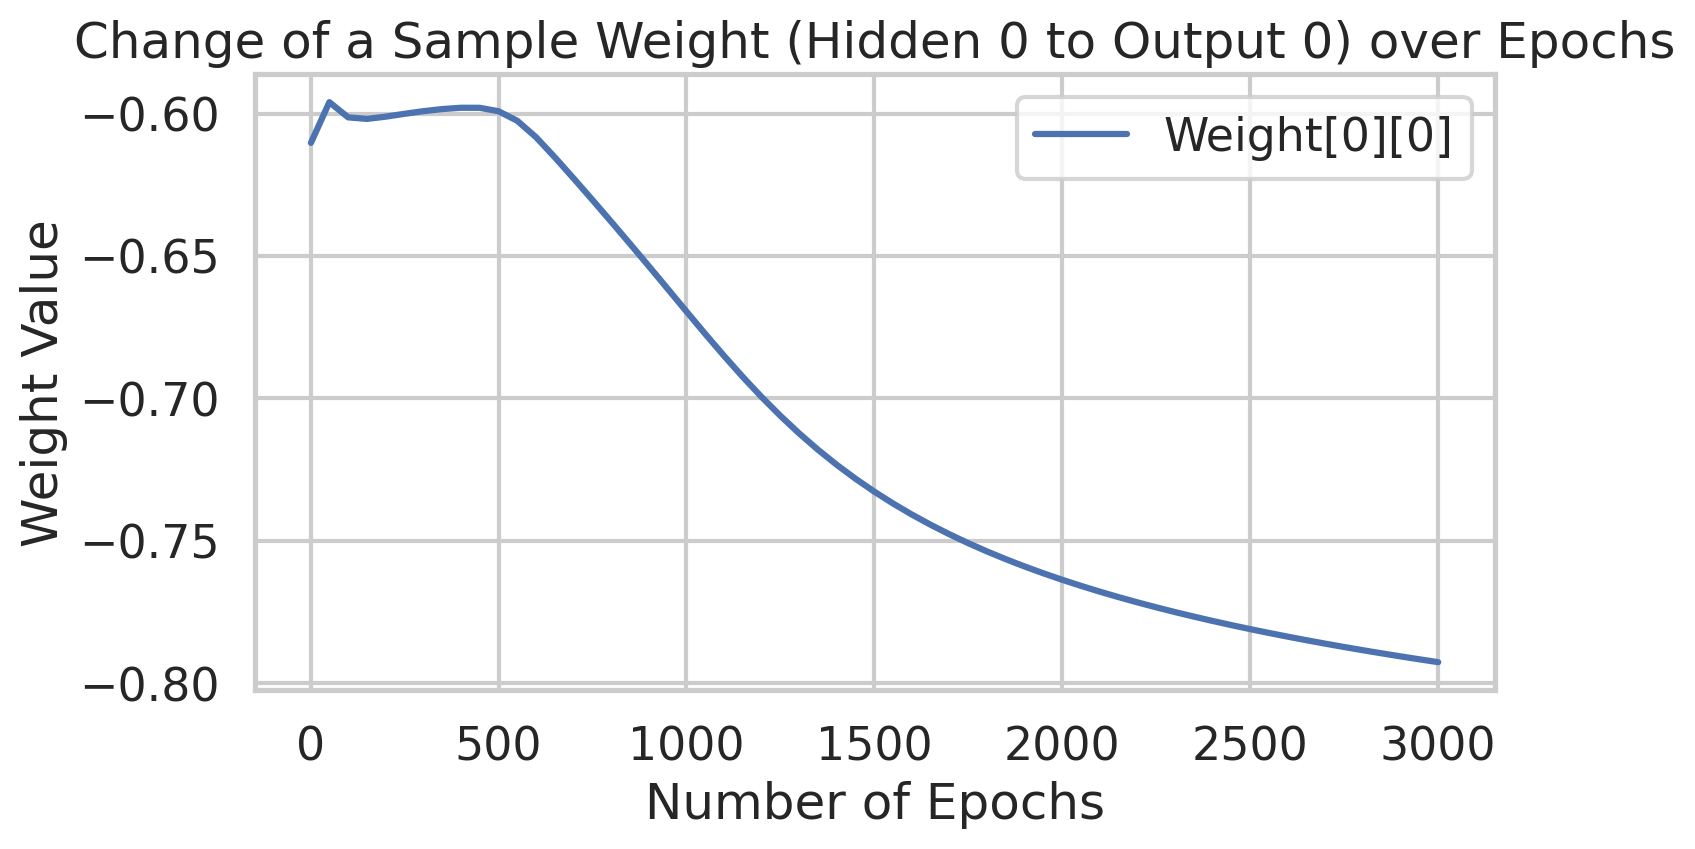

MultiLayerPerceptron(params={'ActivationFunction': 'sigmoid',
                             'BiasHiddenValue': 0, 'BiasOutputValue': 0,
                             'Epocas': 3000, 'HiddenLayer': 30, 'InputLayer': 4,
                             'LearningRate': 0.01, 'OutputLayer': 3})

In [ ]:
dictionary = {
    'InputLayer': 4,
    'HiddenLayer': 30,          # AUMENTADO: Mais capacidade para aprender
    'OutputLayer': 3,
    'Epocas': 3000,
    'LearningRate': 0.01,       # AUMENTADO UM POUCO: Para dar passos maiores
    'BiasHiddenValue': 0,
    'BiasOutputValue': 0,           # MELHORADO
    'ActivationFunction': 'sigmoid' # ALTERNADO: Mais estável para a saída neste caso
}

Perceptron = MultiLayerPerceptron(dictionary)
Perceptron.fit(train_X,train_y)

In [ ]:
prev, dataframe = Perceptron.predict(test_X, test_y)
hits = n_set = n_vers = n_virg = 0
score_set = score_vers = score_virg = 0
for j in range(len(test_y)):
    if(test_y[j] == 0): n_set += 1
    elif(test_y[j] == 1): n_vers += 1
    elif(test_y[j] == 2): n_virg += 1

for i in range(len(test_y)):
    if test_y[i] == prev[i]:
        hits += 1
    if test_y[i] == prev[i] and test_y[i] == 0:
        score_set += 1
    elif test_y[i] == prev[i] and test_y[i] == 1:
        score_vers += 1
    elif test_y[i] == prev[i] and test_y[i] == 2:
        score_virg += 1

hits = (hits / len(test_y)) * 100
faults = 100 - hits

print("Porcents :","%.2f"%(hits),"% hits","and","%.2f"%(faults),"% faults")
print("Total samples of test",len(test_y))
print("*Iris-Setosa:",n_set,"samples", score_set, "hits")
print("*Iris-Versicolour:",n_vers,"samples", score_vers, "hits")
print("*Iris-Virginica:",n_virg,"samples", score_virg, "hits")

Porcents : 100.00 % hits and 0.00 % faults
Total samples of test 30
*Iris-Setosa: 20 samples 20 hits
*Iris-Versicolour: 9 samples 9 hits
*Iris-Virginica: 1 samples 1 hits


Aumenta % de teste e redistribuição de classes

In [ ]:
# Carregando o dataset Iris original e balanceado
iris = load_iris()
X = iris.data
y = iris.target

print(pd.Series(y).value_counts())

0    50
1    50
2    50
Name: count, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    stratify=y,
    random_state=42
)

print("Distribuição de classes no novo conjunto de teste:")
print(pd.Series(y_test).value_counts())

Distribuição de classes no novo conjunto de teste:
2    15
1    15
0    15
Name: count, dtype: int64


Epoch  1 - Total Error:  0.06273957411711317
Epoch  50 - Total Error:  0.023738704858737487
Epoch  100 - Total Error:  0.01665200852614494
Epoch  150 - Total Error:  0.012084494696438462
Epoch  200 - Total Error:  0.009340539099972187
Epoch  250 - Total Error:  0.007708976815855295
Epoch  300 - Total Error:  0.006691240023260624
Epoch  350 - Total Error:  0.0060188769006397
Epoch  400 - Total Error:  0.005550780693379395
Epoch  450 - Total Error:  0.0052100273277627136
Epoch  500 - Total Error:  0.004952511185321383
Epoch  550 - Total Error:  0.004751610784810863
Epoch  600 - Total Error:  0.004590536311611649
Epoch  650 - Total Error:  0.0044584007134323535
Epoch  700 - Total Error:  0.004347985814178681
Epoch  750 - Total Error:  0.0042543149885907496
Epoch  800 - Total Error:  0.004173802207684866
Epoch  850 - Total Error:  0.004103793198302257
Epoch  900 - Total Error:  0.004042298223177931
Epoch  950 - Total Error:  0.003987810594731837
Epoch  1000 - Total Error:  0.00393917287285

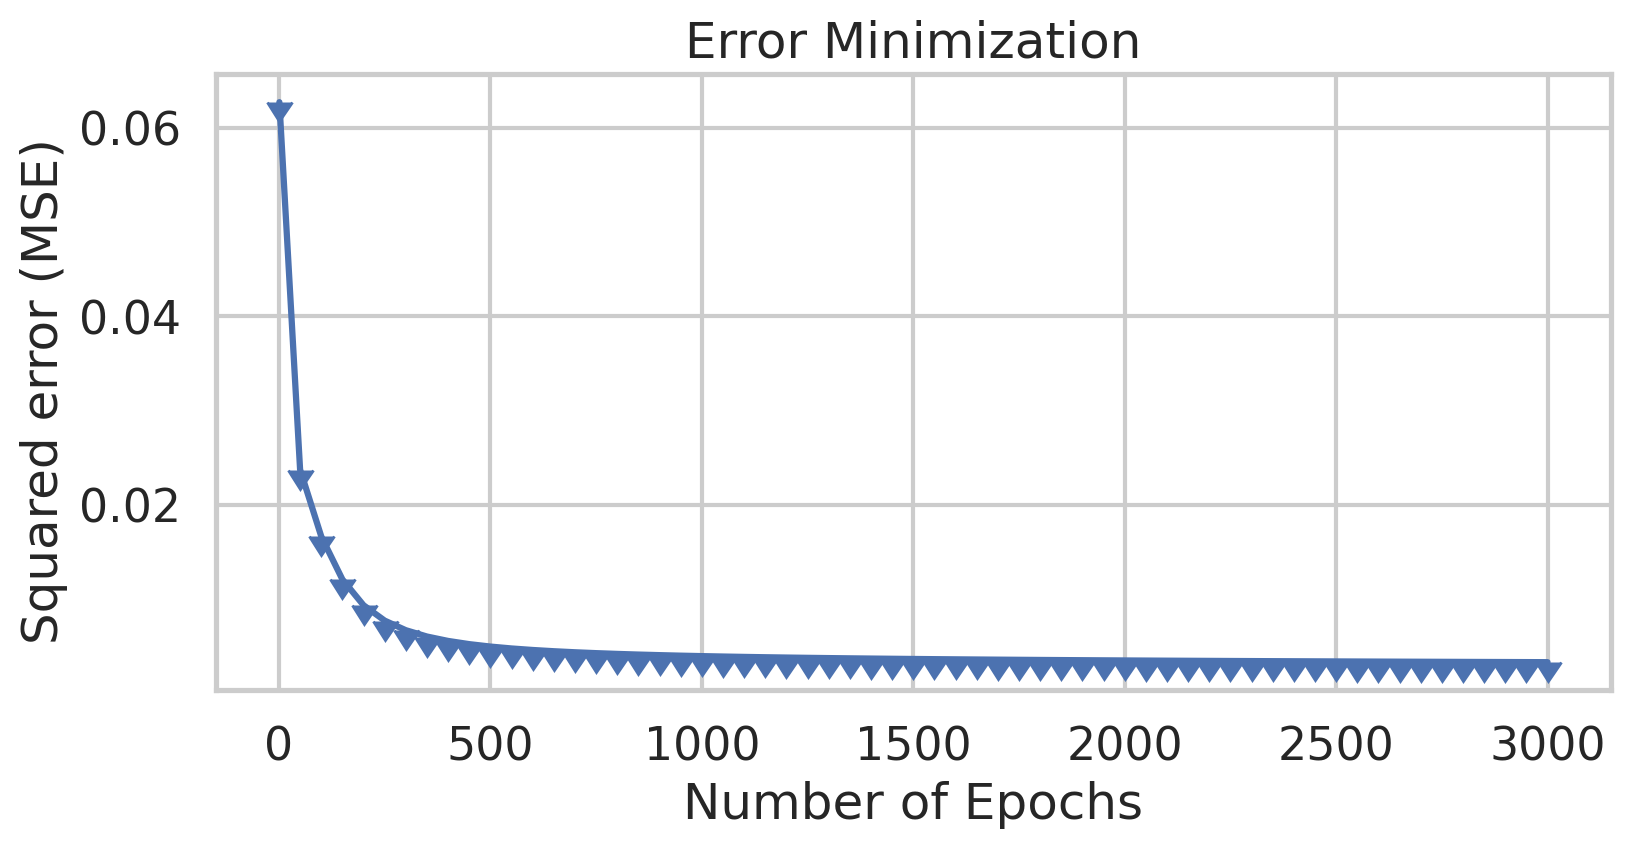

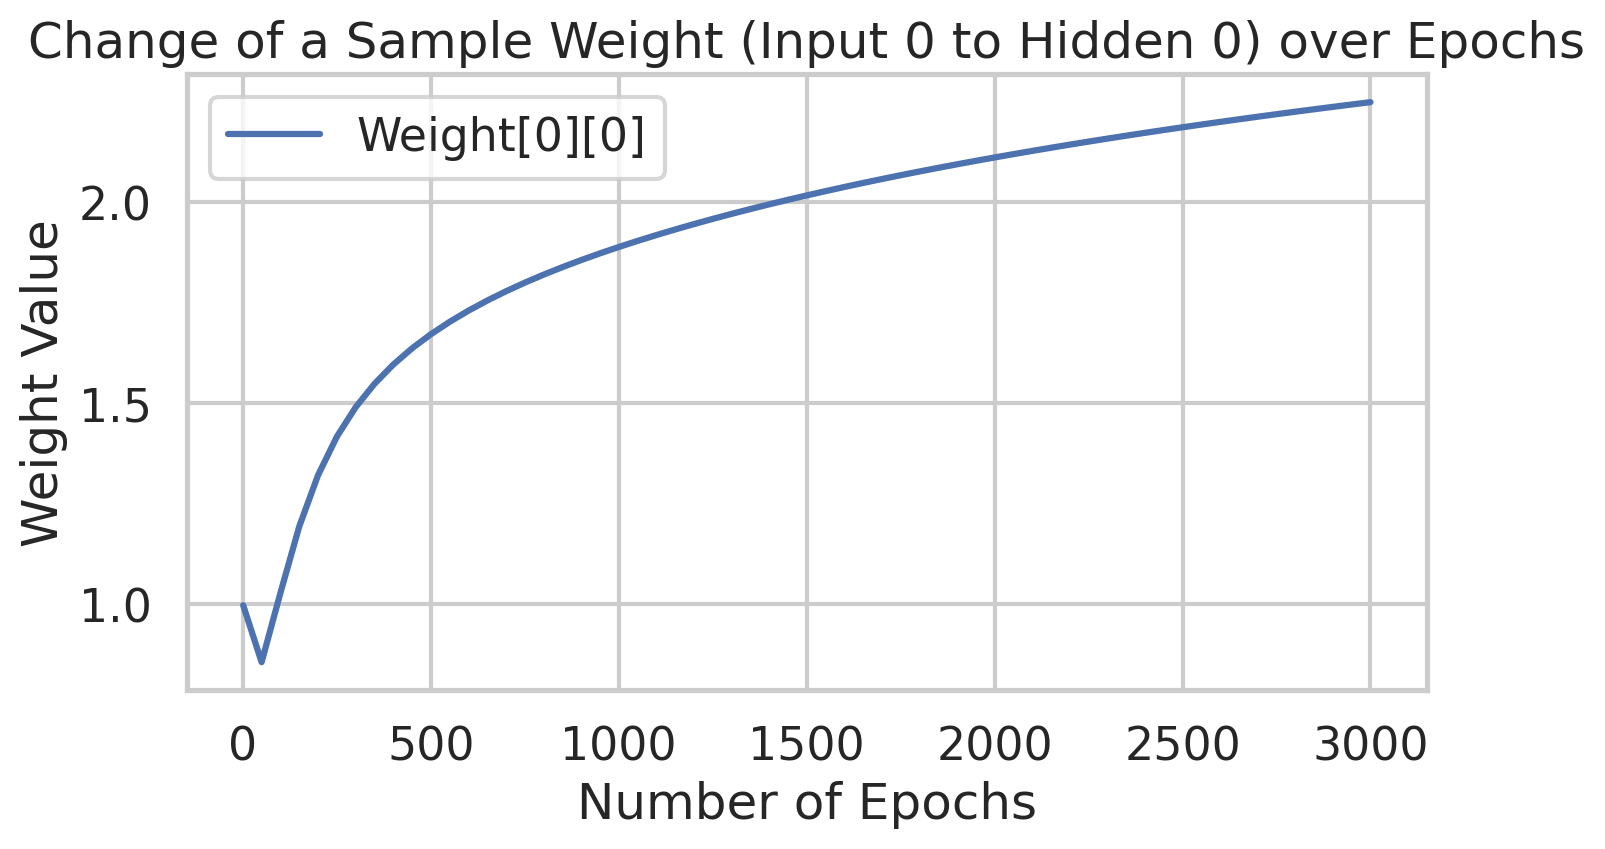

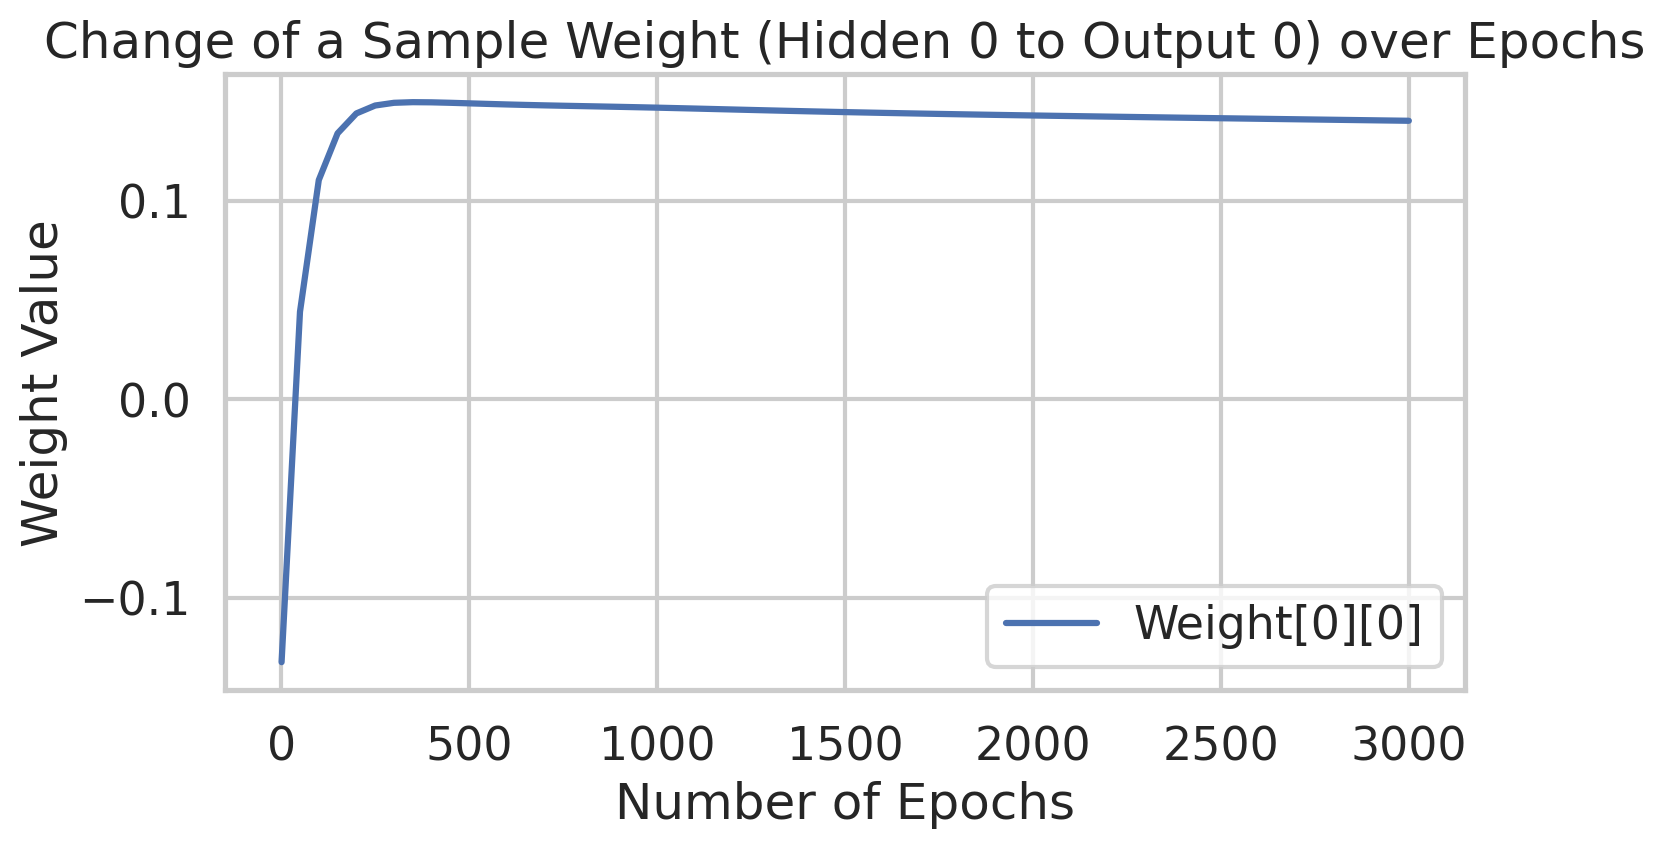

MultiLayerPerceptron(params={'ActivationFunction': 'sigmoid',
                             'BiasHiddenValue': 0, 'BiasOutputValue': 0,
                             'Epocas': 3000, 'HiddenLayer': 30, 'InputLayer': 4,
                             'LearningRate': 0.01, 'OutputLayer': 3})

In [ ]:
dictionary = {
    'InputLayer': 4,
    'HiddenLayer': 30,
    'OutputLayer': 3,
    'Epocas': 3000,
    'LearningRate': 0.01,
    'BiasHiddenValue': 0,
    'BiasOutputValue': 0,
    'ActivationFunction': 'sigmoid'
}

Perceptron = MultiLayerPerceptron(dictionary)
Perceptron.fit(X_train,y_train)

In [ ]:
prev, dataframe = Perceptron.predict(X_test, y_test)
hits = n_set = n_vers = n_virg = 0
score_set = score_vers = score_virg = 0
for j in range(len(y_test)):
    if(y_test[j] == 0): n_set += 1
    elif(y_test[j] == 1): n_vers += 1
    elif(y_test[j] == 2): n_virg += 1

for i in range(len(y_test)):
    if y_test[i] == prev[i]:
        hits += 1
    if y_test[i] == prev[i] and y_test[i] == 0:
        score_set += 1
    elif y_test[i] == prev[i] and y_test[i] == 1:
        score_vers += 1
    elif y_test[i] == prev[i] and y_test[i] == 2:
        score_virg += 1

hits = (hits / len(y_test)) * 100
faults = 100 - hits

print("Porcents :","%.2f"%(hits),"% hits","and","%.2f"%(faults),"% faults")
print("Total samples of test",len(y_test))
print("*Iris-Setosa:",n_set,"samples", score_set, "hits")
print("*Iris-Versicolour:",n_vers,"samples", score_vers, "hits")
print("*Iris-Virginica:",n_virg,"samples", score_virg, "hits")

Porcents : 44.44 % hits and 55.56 % faults
Total samples of test 45
*Iris-Setosa: 15 samples 0 hits
*Iris-Versicolour: 15 samples 15 hits
*Iris-Virginica: 15 samples 5 hits


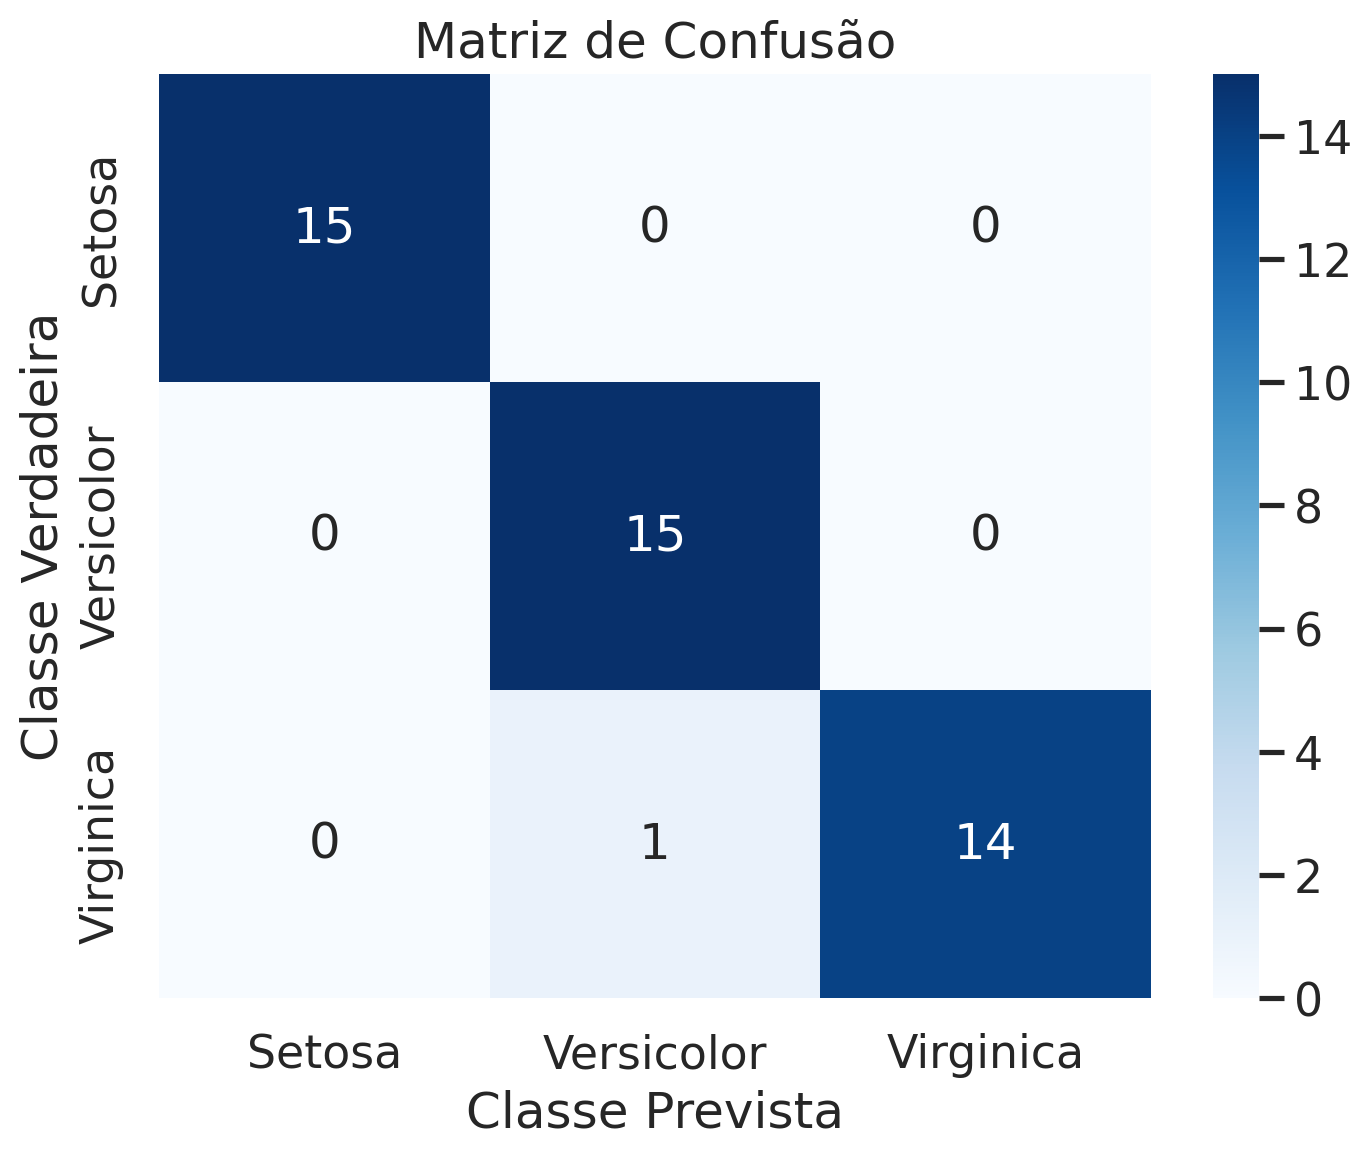

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred_classes = prev
y_true_classes = y_test

# Crie a matriz de confusão
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Nomes das classes do Iris para os eixos do gráfico
class_names = ['Setosa', 'Versicolor', 'Virginica']

# Plotando a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Matriz de Confusão')
plt.ylabel('Classe Verdadeira')
plt.xlabel('Classe Prevista')
plt.show()

--- Exibindo o Gráfico Salvo do Experimento Problemático (eu reexecutei a celula sem querer) (44.44% de Acurácia) ---


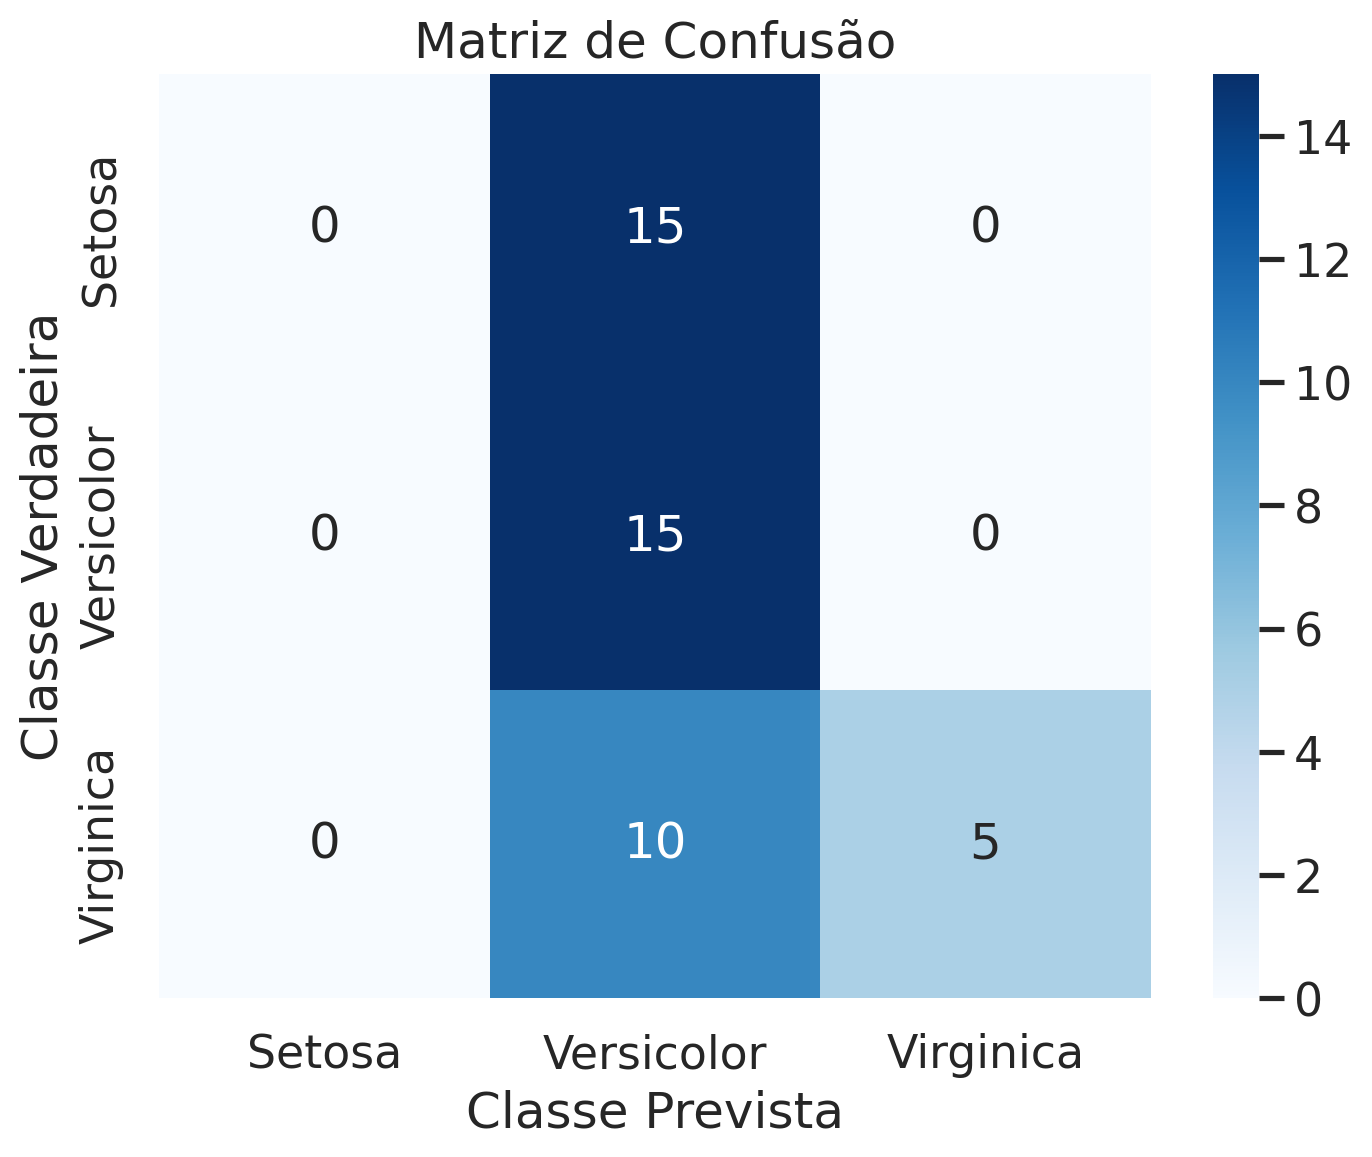

In [ ]:
from IPython.display import Image, display

nome_do_arquivo_salvo = 'bad-result.png'

print("--- Exibindo o Gráfico Salvo do Experimento Problemático (eu reexecutei a celula sem querer) (44.44% de Acurácia) ---")

display(Image(filename=nome_do_arquivo_salvo, width=690))

Maior número de neurônios, portanto mais epocas e menor Learning Hate

Epoch  1 - Total Error:  0.081585979691752
Epoch  50 - Total Error:  0.022216664384464492
Epoch  100 - Total Error:  0.017294542092765923
Epoch  150 - Total Error:  0.014432615030252035
Epoch  200 - Total Error:  0.01216777410406111
Epoch  250 - Total Error:  0.010567761306586718
Epoch  300 - Total Error:  0.009340691704931054
Epoch  350 - Total Error:  0.008386765890136082
Epoch  400 - Total Error:  0.007638927634766045
Epoch  450 - Total Error:  0.007042811974262785
Epoch  500 - Total Error:  0.006560160143547279
Epoch  550 - Total Error:  0.006164221296463547
Epoch  600 - Total Error:  0.005835611428643773
Epoch  650 - Total Error:  0.005559986123341142
Epoch  700 - Total Error:  0.0053265931641142605
Epoch  750 - Total Error:  0.005127269834106274
Epoch  800 - Total Error:  0.004955723908406494
Epoch  850 - Total Error:  0.004807018783517524
Epoch  900 - Total Error:  0.0046772133839387865
Epoch  950 - Total Error:  0.004563120556490413
Epoch  1000 - Total Error:  0.004462148691842

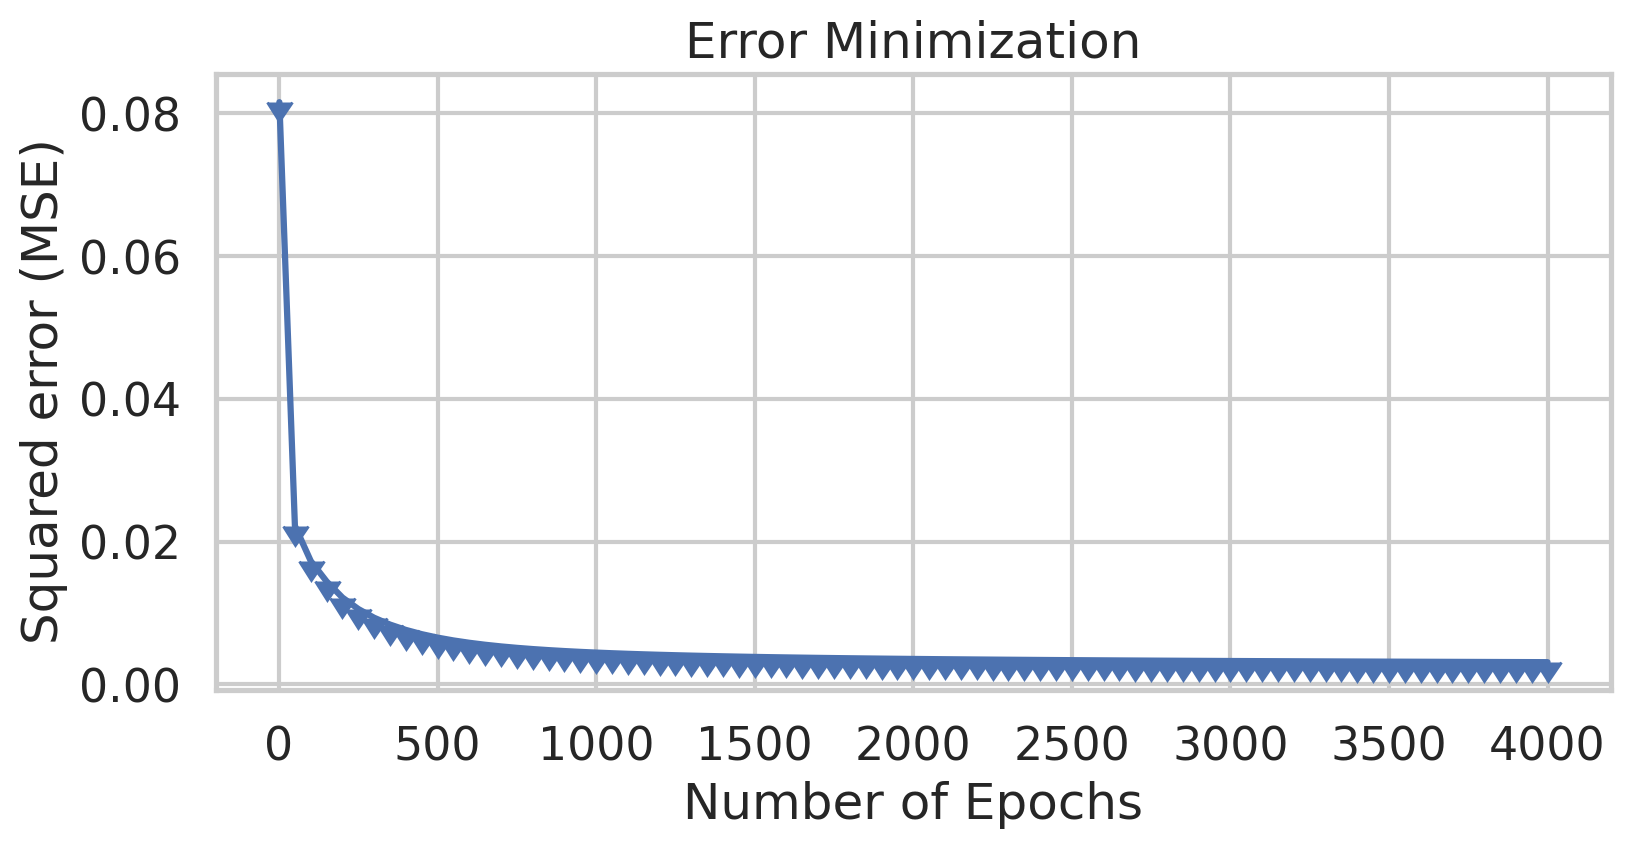

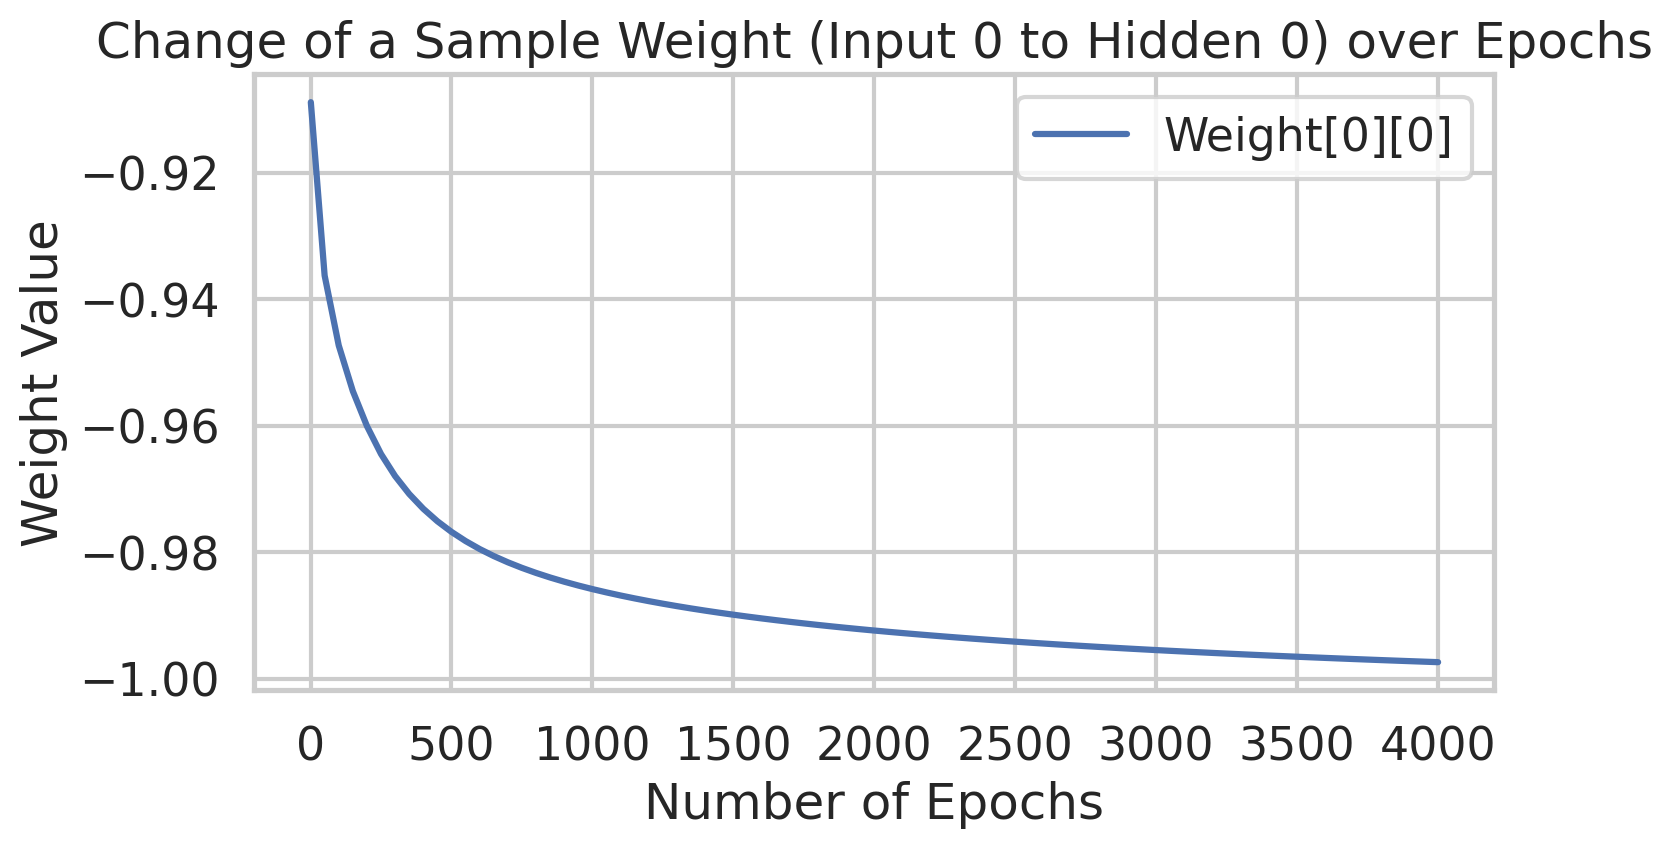

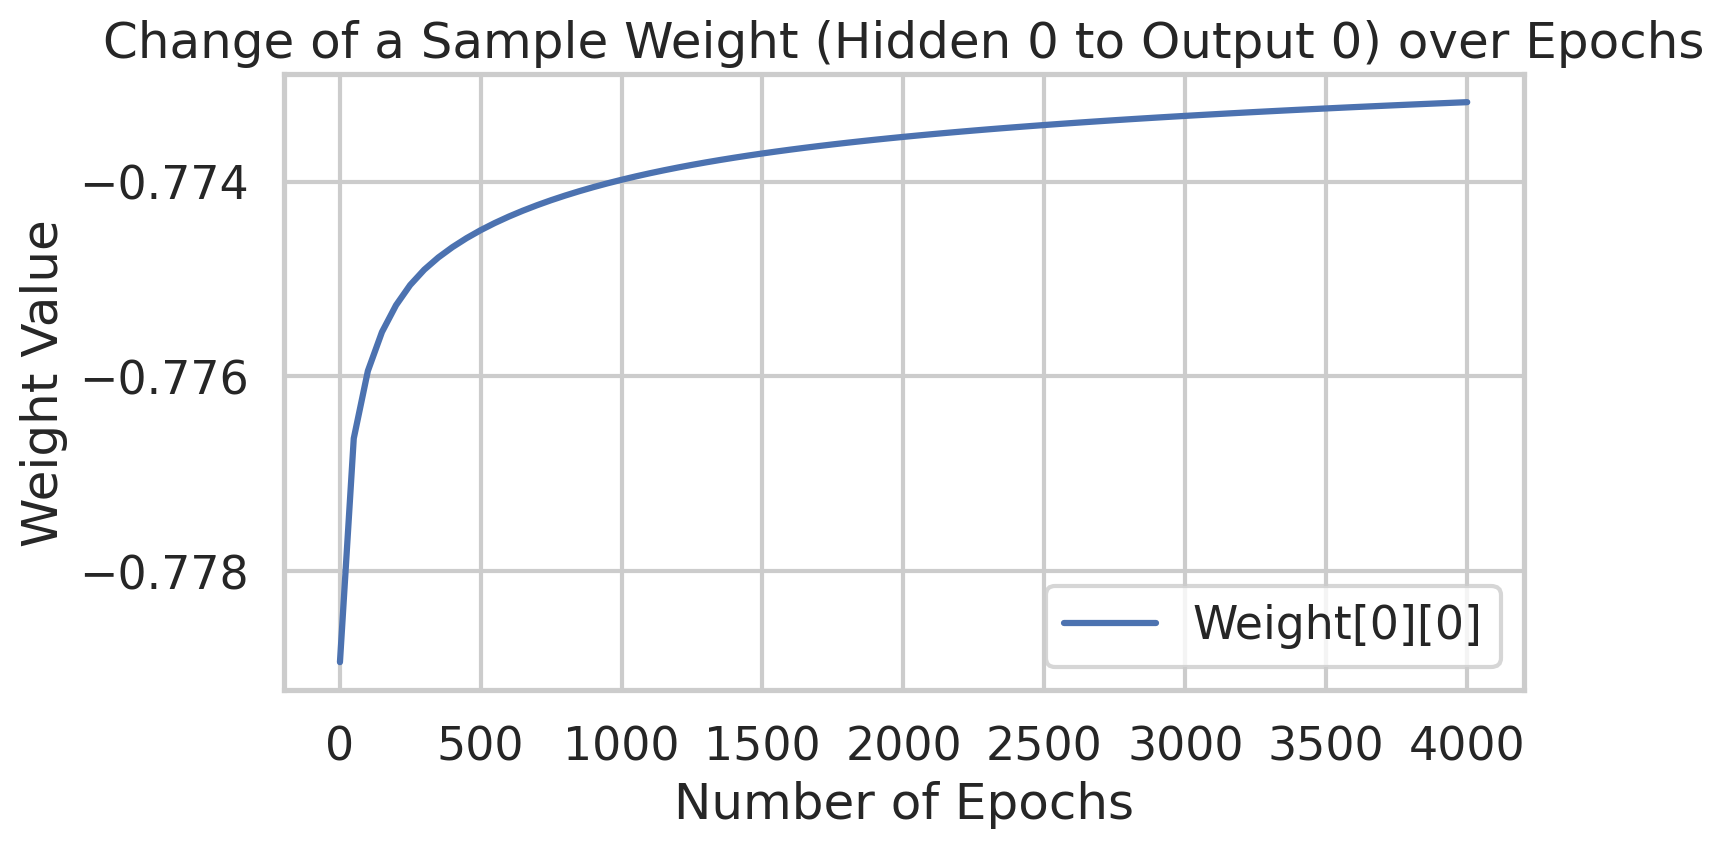

MultiLayerPerceptron(params={'ActivationFunction': 'sigmoid',
                             'BiasHiddenValue': 0, 'BiasOutputValue': 0,
                             'Epocas': 4000, 'HiddenLayer': 60, 'InputLayer': 4,
                             'LearningRate': 0.005, 'OutputLayer': 3})

In [ ]:

params_robusto = {
    'InputLayer': 4,
    'HiddenLayer': 60,
    'OutputLayer': 3,
    'Epocas': 4000,
    'LearningRate': 0.005,
    'BiasHiddenValue': 0,
    'BiasOutputValue': 0,
    'ActivationFunction': 'sigmoid'
}

modelo_corrigido = MultiLayerPerceptron(params_robusto)
modelo_corrigido.fit(X_train, y_train)

In [ ]:
prev, dataframe = modelo_corrigido.predict(X_test, y_test)
hits = n_set = n_vers = n_virg = 0
score_set = score_vers = score_virg = 0
for j in range(len(y_test)):
    if(y_test[j] == 0): n_set += 1
    elif(y_test[j] == 1): n_vers += 1
    elif(y_test[j] == 2): n_virg += 1

for i in range(len(y_test)):
    if y_test[i] == prev[i]:
        hits += 1
    if y_test[i] == prev[i] and y_test[i] == 0:
        score_set += 1
    elif y_test[i] == prev[i] and y_test[i] == 1:
        score_vers += 1
    elif y_test[i] == prev[i] and y_test[i] == 2:
        score_virg += 1

hits = (hits / len(y_test)) * 100
faults = 100 - hits

print("Porcents :","%.2f"%(hits),"% hits","and","%.2f"%(faults),"% faults")
print("Total samples of test",len(y_test))
print("*Iris-Setosa:",n_set,"samples", score_set, "hits")
print("*Iris-Versicolour:",n_vers,"samples", score_vers, "hits")
print("*Iris-Virginica:",n_virg,"samples", score_virg, "hits")

Porcents : 97.78 % hits and 2.22 % faults
Total samples of test 45
*Iris-Setosa: 15 samples 15 hits
*Iris-Versicolour: 15 samples 15 hits
*Iris-Virginica: 15 samples 14 hits


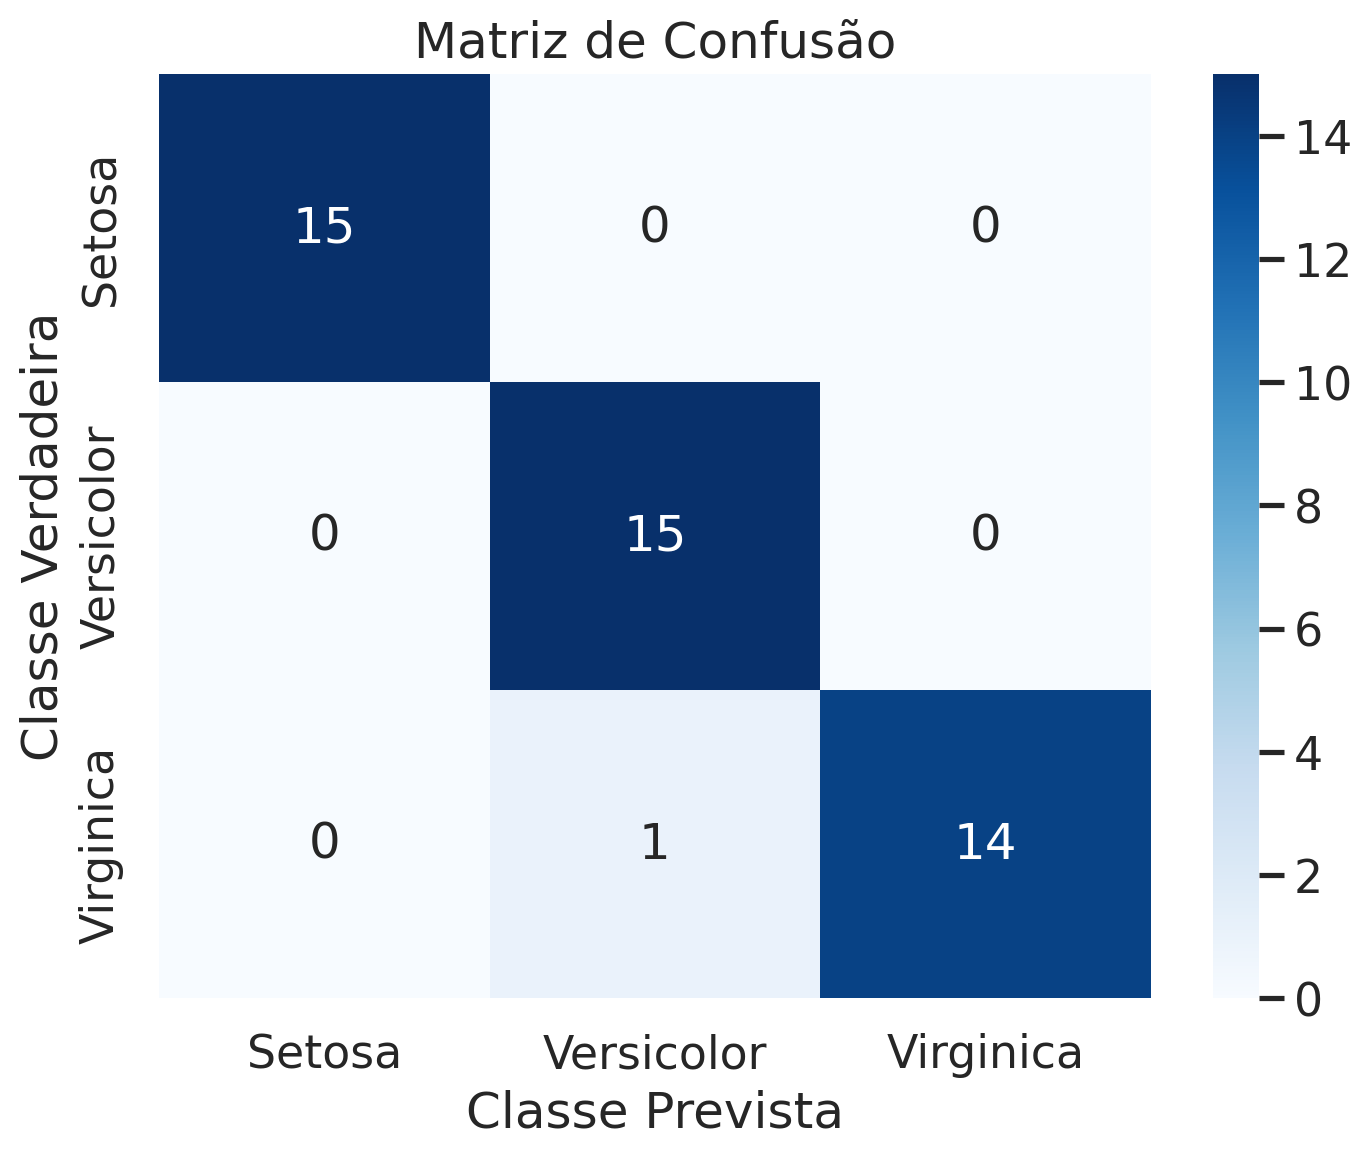

In [ ]:
y_pred_classes = prev
y_true_classes = y_test

# Crie a matriz de confusão
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Nomes das classes do Iris para os eixos do gráfico
class_names = ['Setosa', 'Versicolor', 'Virginica']

# Plotando a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Matriz de Confusão')
plt.ylabel('Classe Verdadeira')
plt.xlabel('Classe Prevista')
plt.show()

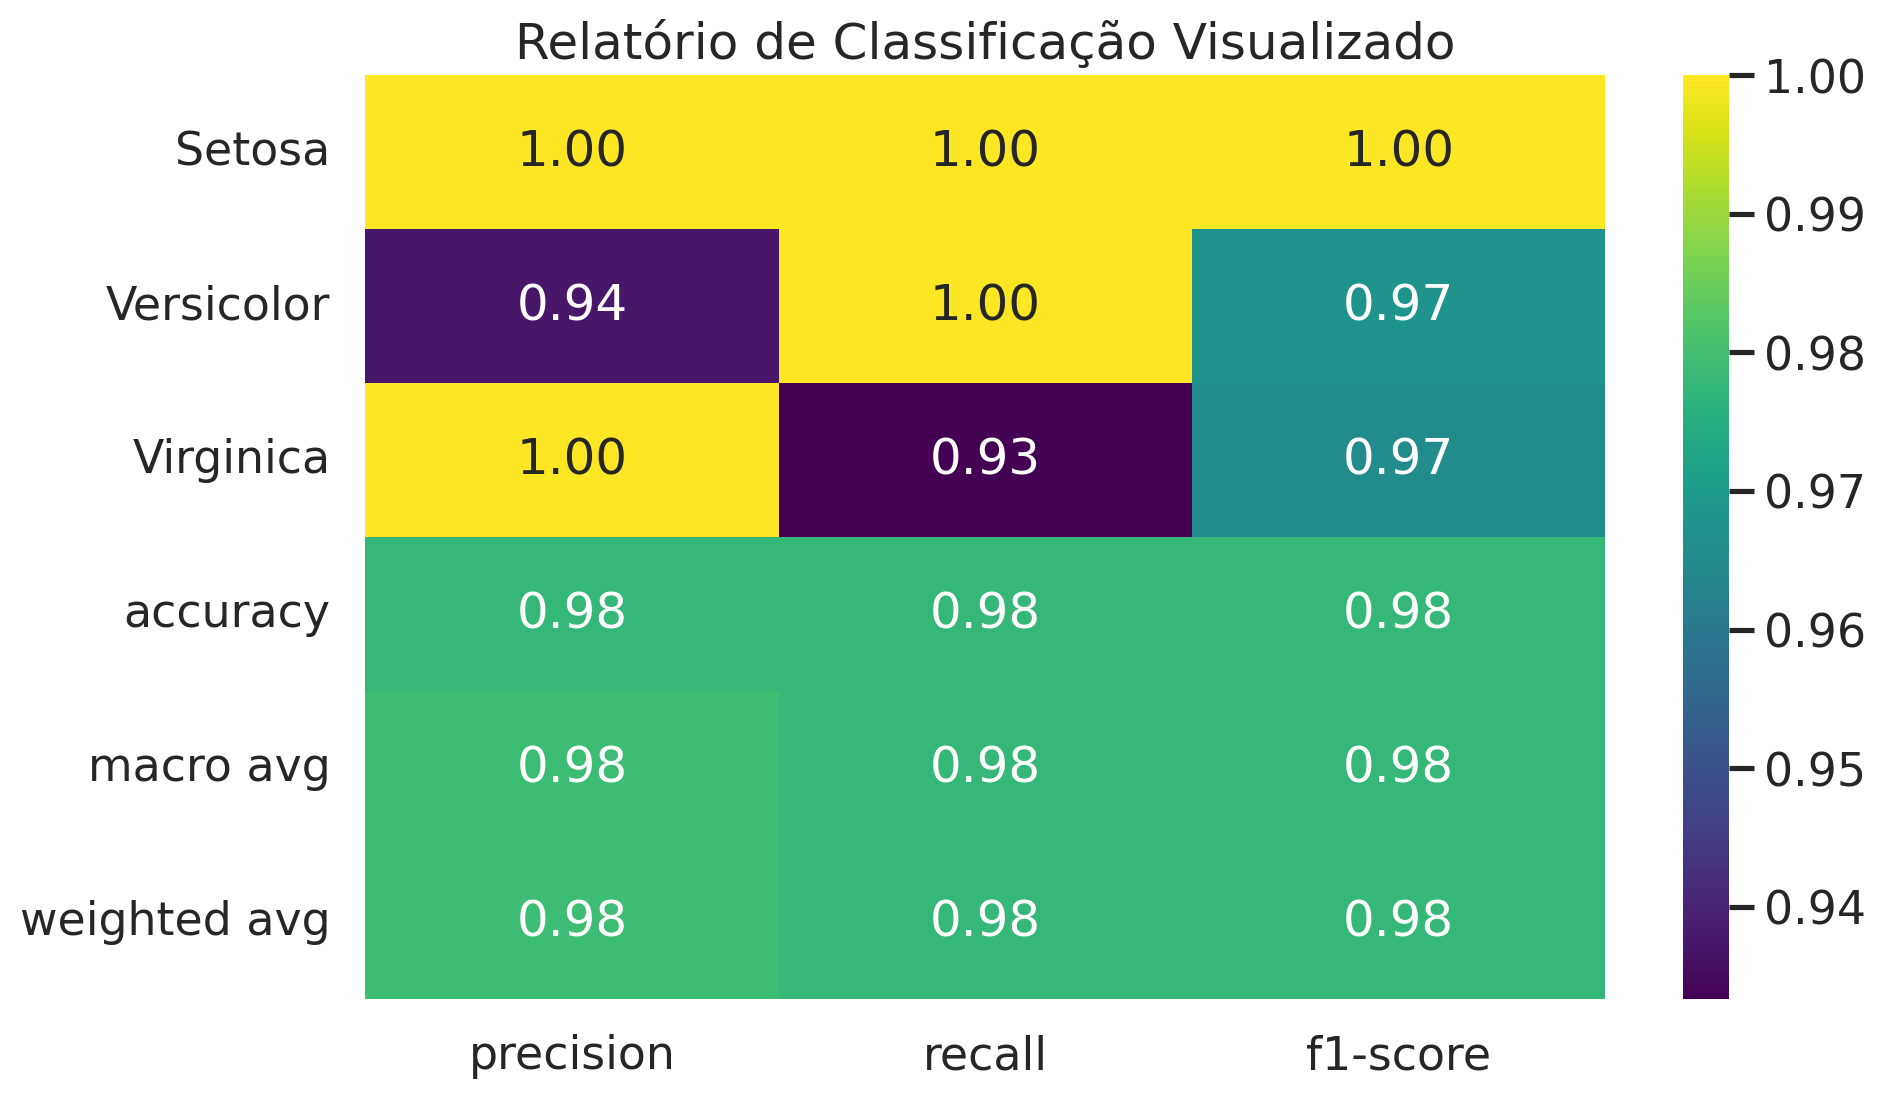

In [ ]:
from sklearn.metrics import classification_report

y_true_classes = y_test
y_pred_classes = prev

class_names = ['Setosa', 'Versicolor', 'Virginica']

report_dict = classification_report(y_true_classes, y_pred_classes,
                                    target_names=class_names, output_dict=True)

report_df = pd.DataFrame(report_dict).iloc[:-1, :].T

plt.figure(figsize=(10, 6))
sns.heatmap(report_df, annot=True, cmap='viridis', fmt='.2f')
plt.title('Relatório de Classificação Visualizado')
plt.show()

# Teste mudando para tanh e outros parametros

Epoch  1 - Total Error:  0.08331437231823585
Epoch  50 - Total Error:  0.005754010614425353
Epoch  100 - Total Error:  0.004775076201357775
Epoch  150 - Total Error:  0.0027969800596064124
Epoch  200 - Total Error:  0.0014902802355961984
Epoch  250 - Total Error:  0.0011846810095523757
Epoch  300 - Total Error:  0.0010192500336854045
Epoch  350 - Total Error:  0.0009086551373521052
Epoch  400 - Total Error:  0.000826298942439614
Epoch  450 - Total Error:  0.0007610047404113752
Epoch  500 - Total Error:  0.0007075992265195808
Epoch  550 - Total Error:  0.000662893312643439
Epoch  600 - Total Error:  0.0006246806250101369
Epoch  650 - Total Error:  0.0005914222843942954
Epoch  700 - Total Error:  0.0005620519433507695
Epoch  750 - Total Error:  0.0005358225974836697
Epoch  800 - Total Error:  0.000512195435847258
Epoch  850 - Total Error:  0.0004907667123390239
Epoch  900 - Total Error:  0.00047122242295355844
Epoch  950 - Total Error:  0.000453310790996199
Epoch  1000 - Total Error:  0.

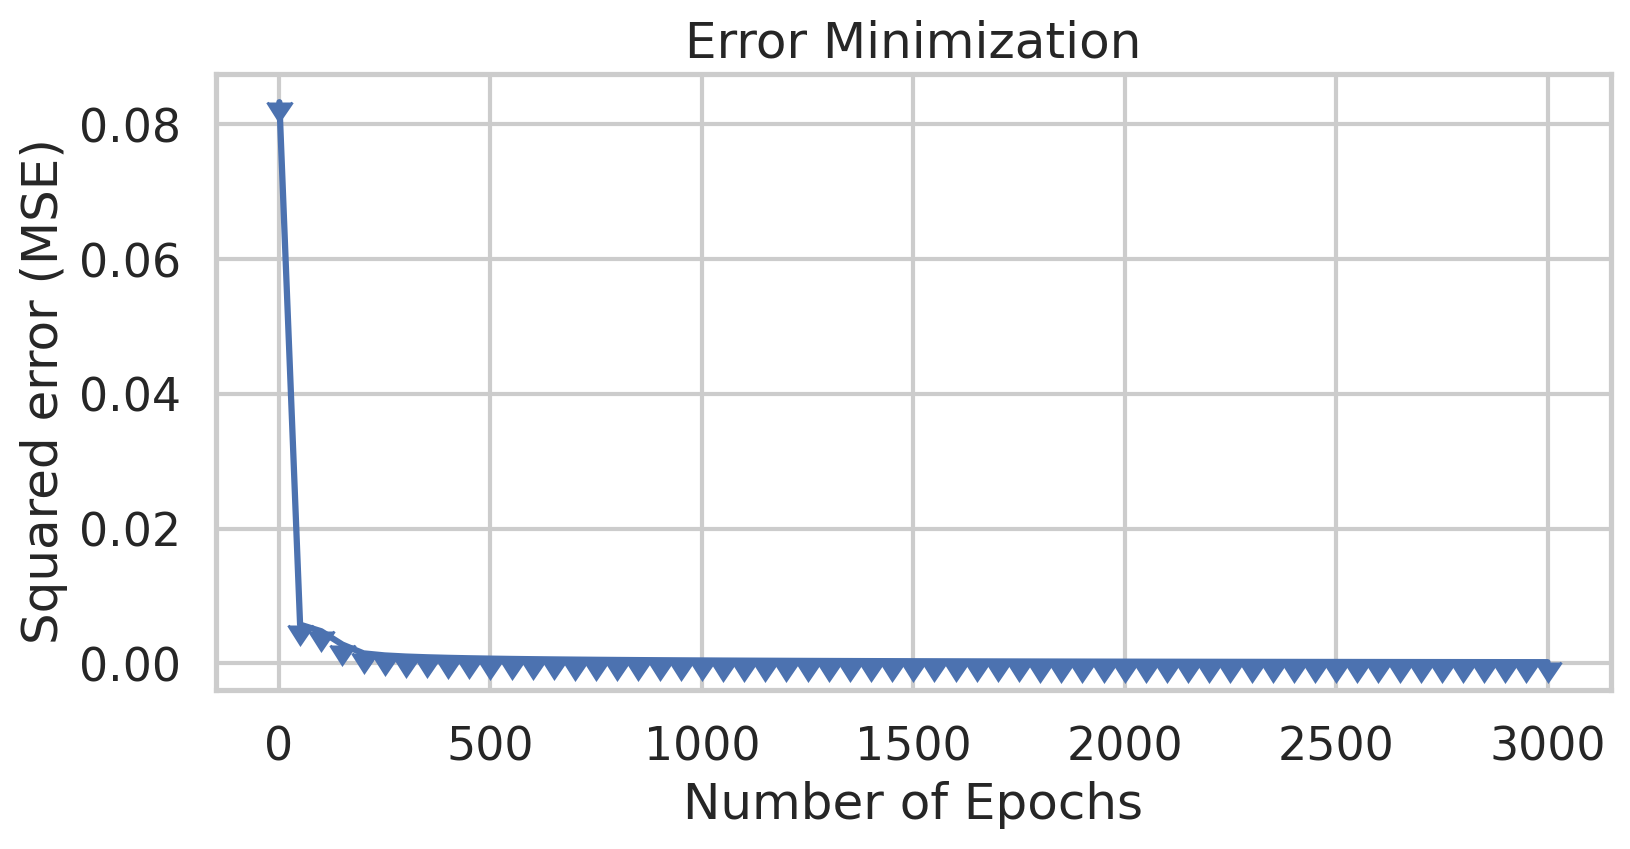

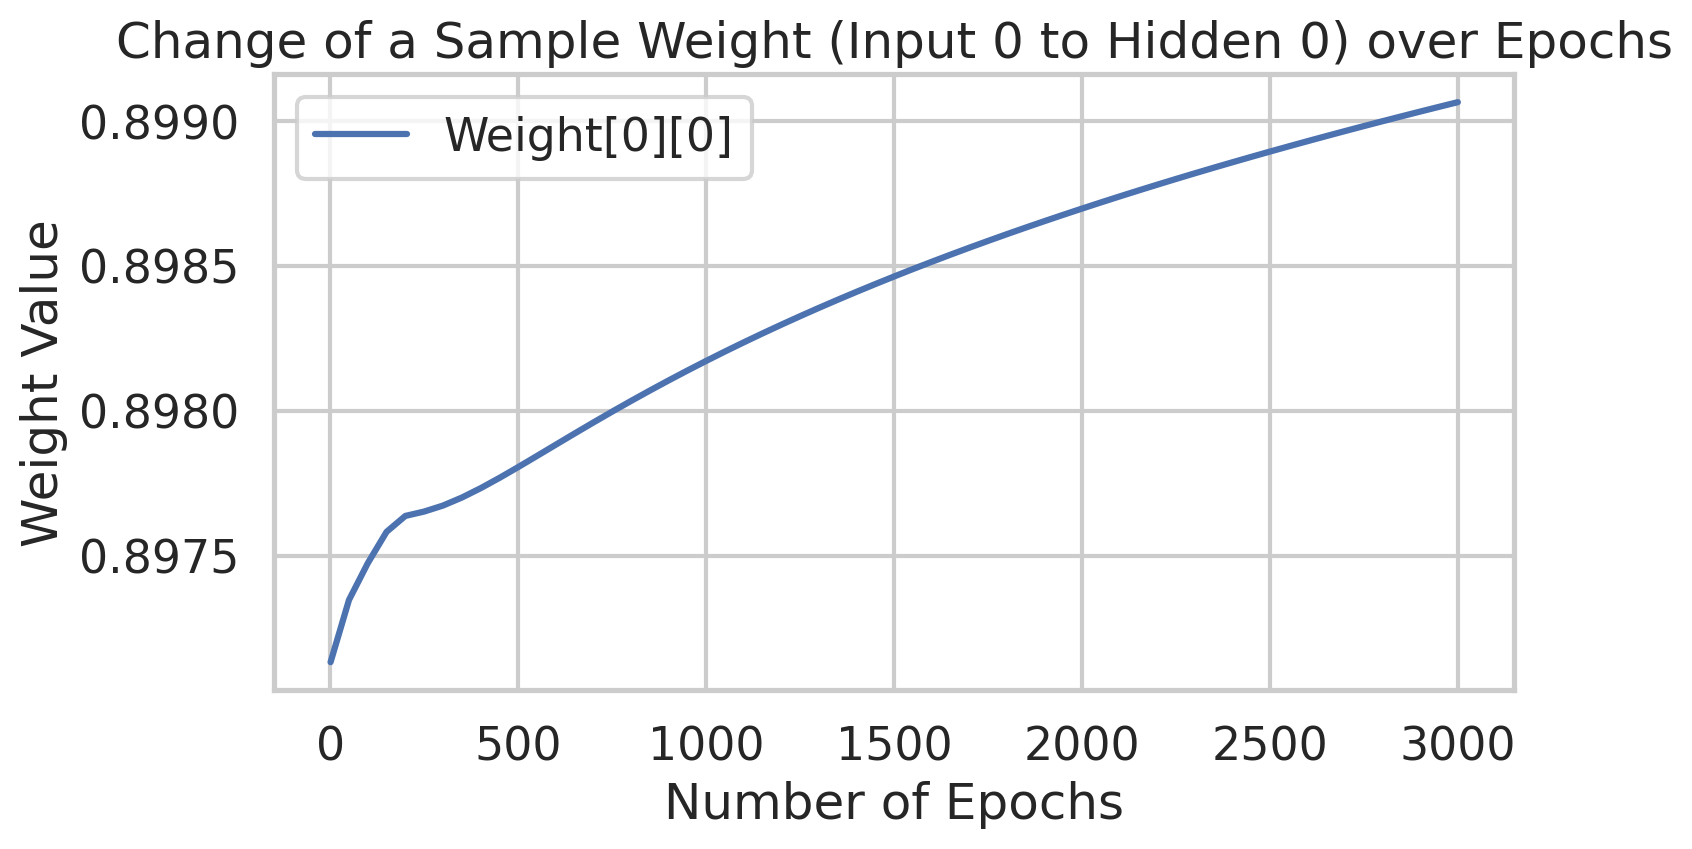

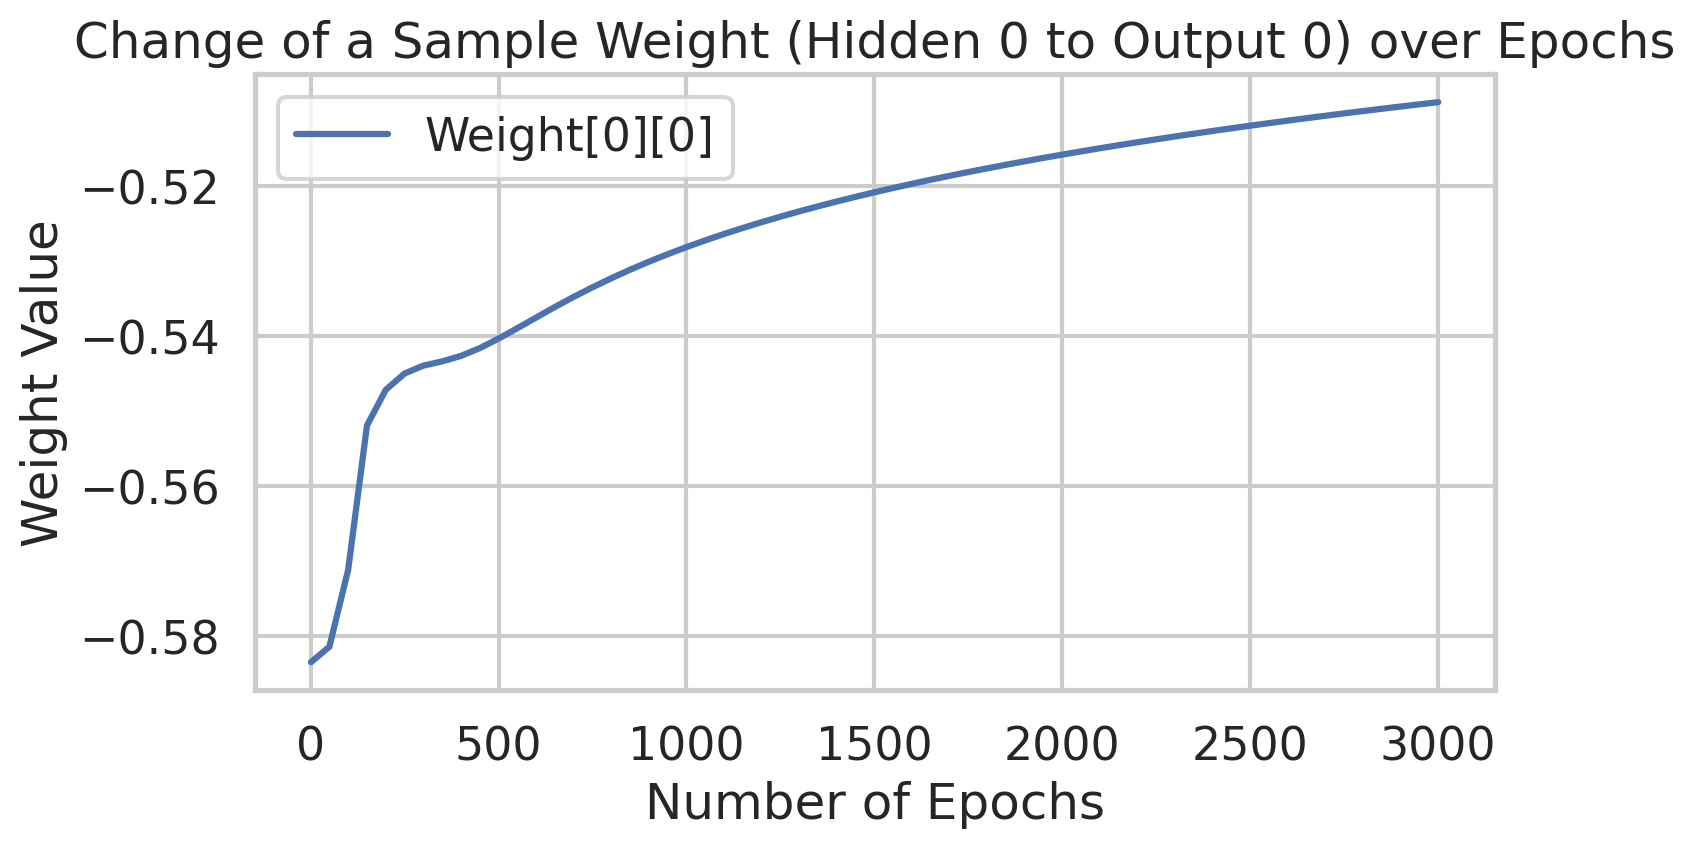

MultiLayerPerceptron(params={'ActivationFunction': 'tanh',
                             'BiasHiddenValue': -1, 'BiasOutputValue': -1,
                             'Epocas': 3000, 'HiddenLayer': 10, 'InputLayer': 4,
                             'LearningRate': 0.01, 'OutputLayer': 3})

In [ ]:
dictionary = {
    'InputLayer': 4,
    'HiddenLayer': 10,
    'OutputLayer': 3,
    'Epocas': 3000,
    'LearningRate': 0.01,
    'BiasHiddenValue': -1,
    'BiasOutputValue': -1,
    'ActivationFunction': 'tanh'
}

Perceptron = MultiLayerPerceptron(dictionary)
Perceptron.fit(train_X,train_y)

In [ ]:
prev, dataframe = Perceptron.predict(test_X, test_y)
hits = n_set = n_vers = n_virg = 0
score_set = score_vers = score_virg = 0
for j in range(len(test_y)):
    if(test_y[j] == 0): n_set += 1
    elif(test_y[j] == 1): n_vers += 1
    elif(test_y[j] == 2): n_virg += 1

for i in range(len(test_y)):
    if test_y[i] == prev[i]:
        hits += 1
    if test_y[i] == prev[i] and test_y[i] == 0:
        score_set += 1
    elif test_y[i] == prev[i] and test_y[i] == 1:
        score_vers += 1
    elif test_y[i] == prev[i] and test_y[i] == 2:
        score_virg += 1

hits = (hits / len(test_y)) * 100
faults = 100 - hits

print("Porcents :","%.2f"%(hits),"% hits","and","%.2f"%(faults),"% faults")
print("Total samples of test",len(test_y))
print("*Iris-Setosa:",n_set,"samples", score_set, "hits")
print("*Iris-Versicolour:",n_vers,"samples", score_vers, "hits")
print("*Iris-Virginica:",n_virg,"samples", score_virg, "hits")

Porcents : 70.00 % hits and 30.00 % faults
Total samples of test 30
*Iris-Setosa: 20 samples 12 hits
*Iris-Versicolour: 9 samples 8 hits
*Iris-Virginica: 1 samples 1 hits


**OVERFITTING**